In [1]:
#===================================================
#===================================================
# PLOTTING PROGRAM FOR THE LEARNING STYLES
#===================================================
#===================================================
#===================================================
#===================================================
# CHAEA3S:
# CHAEA AUTOMATIC ANALYSIS OF LEARNING STYLES
#===================================================
#===================================================
# VERSION 3.0
#
# This program implements a principal component 
# analysis of the learning styles of a group of
# students as prescribed by CHAEA:
# activist, theorist, pragmatist, and reflector.
# The program is based on the program 
# learning_styles_v5b.py, by Fabio Revuelta.
#
# Further information can be found in the reference:
# J. Ablanque, V. Gabaldon, P. Almendros, J. C. Losada,
# R. M. Benito,  and F. Revuelta
# "CHAEA3S: A software for the automated principal-component
# analysis of learning styles"
# Journal of Science Education and Technology (2024).
#
# The software provided here is distributed on an “as-is” basis,
# without any warranties or guarantees of any kind.
# While we have made every effort to ensure its accuracy
# and reliability, we cannot be held responsible for any
# unintended consequences, errors, or issues that may arise from its use.
# Users are encouraged to thoroughly test the software,
# review the source code, and exercise due diligence before deploying it 
# in any critical environment.
#
# By using this software, you agree to hold the developers harmless 
# from any liability, damages, or losses resulting from its use.
# Additionally, we kindly request that you cite the reference mentioned
# above when sharing or distributing it, and 
# acknowledge Fabio Revuelta as the author of this software and 
#
# Feel free to adapt this disclaimer further to match your specific context.
# And remember to give credit to us :)
#
# Copyright 2024 Fabio Revuelta
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     http://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
# Author: Fabio Revuelta
#         Grupo de Sistemas Complejos
#         Universidad Politecnica de Madrid
#         Madrid, February 2024
#
#===================================================
# PRELIMINARIES
#===================================================
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib import cm
#
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os, fnmatch
from matplotlib.ticker import  MultipleLocator, FormatStrFormatter
from decimal import Decimal
from numpy.linalg import eig
#
import statistics
import scipy.stats as st
from mpl_toolkits.mplot3d.art3d import Poly3DCollection # New import
import random
#
from random import seed
from random import gauss
from scipy.stats import linregress
from scipy.optimize import curve_fit
#
import itertools
import datetime
#
# Necessary libraries for the summary report
import subprocess
#
from docx import Document
from docx.shared import Inches
from docx2pdf import convert
#
# Necessary for the log file
import os
import sys
import datetime
#
#
#===================================================
# CHAEA3S.LOG FILE
#===================================================
# Current folder
current_folder = os.getcwd()
print('Current folder : ' + current_folder)
print(' ')
#
# Output folders
output_gen = current_folder + '/output'
os.makedirs(output_gen, exist_ok=True) 
print('Output general folder         : ' + output_gen)
print(' ')
#
# Define the file name for logging
log_file = "output/chaea3s.log"
#
if os.path.exists(log_file):
  os.remove(log_file)
  print(f"File '{log_file}' removed successfully.")
else:
  print(f"File '{log_file}' did not previously exist.")
#
print(f"File '{log_file}' created.")
print()
#
# Create a new log_file
with open(log_file, "w") as f:
  f.write('==============================\n')
  f.write('CHAEA3S.LOG\n')
  f.write('==============================\n')
  f.write('This file contains all the information on the execution of CHAEA3S package\n')
  f.write('\n')
  pass
#
# Define a custom print function
def printt(*args):
  print(*args, end=' ')
  #
  with open(log_file, "a", encoding='utf-8') as f:
    f.write(str(*args)+'\n')
#
# Redirect stdout to log file
#sys.stdout = open(log_file, "a")
#
# Get the current date and time
current_datetime = datetime.datetime.now()
#
# Format the date and time as a string
formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")
printt('Program starts on: ' + formatted_datetime)
printt(' ')
#
# Check operating system
# (necessary to transform the docx report in pdf)
if(sys.platform == 'linux' or sys.platform == 'linux2'):
  operating_system = 'linux'
  printt('The operating system is Linu.x')
elif(sys.platform == 'darwin'):
  operating_system = 'mac'
  printt('The operating system is macOS (Darwin).')
elif(sys.platform == 'win32' or sys.platform == 'win64'):
  operating_system = 'win'
  printt('The operating system is Windows.')
#
#===================================================
# PLOT PARAMETERS
#===================================================
#----------------------------------------------------
def write_number_with_decimals(x, n):
  return "{:.{}f}".format(x, n)
#----------------------------------------------------
def find_number_position(string, number):
  try:
    position = string.index(str(number))
    return position
  except ValueError:
    return -1  # Number not found in the string
#----------------------------------------------------
def mean_uncert(x, dx):
# This subroutine returns a string with the average mean
# and the corresponding uncertainty with the correct 
# number of decimals
# Convert numbers to strings
  x_str  = str(x)
  dx_str = str(dx)
#
# Get the three most significant digits of dx
# (in case the point is included)
  for digit in dx_str:
    if(digit != '0' and digit != '.'):
      dx0 = int(digit)
      break
#     
  pos0 = find_number_position(dx_str, dx0)
  dec  = find_number_position(dx_str, '.')
  if(dec == -1):
    dx_str = dx_str + '.0'
    dec  = find_number_position(dx_str, '.')
#
  if(dx0 != 1):
#   dx0 > 1
    if( pos0 < dec ):
      dx_out = dx_str[pos0]
      for j in range(pos0, dec-1):
        dx_out = dx_out + '0'
    else:
      dx_out = dx_str[0:pos0+1]
  else:
#
#   dx0 = 1    
    if( pos0 > dec ):
      if(pos0+1 == len(dx_str)):
        dx_out = dx_str + '0'
      else:
        dx_out = dx_str[0:pos0+2]    
    else:
      if(pos0+1 == dec):
        if(pos0+2 == len(dx_str)):
          dx_out = dx_str + '0'
        else:
          dx_out = dx_str[0:pos0+3]    
      else:
        dx_out = dx_str[pos0] + dx_str[pos0+1]
        for j in range(pos0+1, dec-1):
          dx_out = dx_out + '0'
#  
# Count the number of decimals
  num_decimals = len(dx_out.split('.')[1]) if '.' in dx_out else 0
# 
# Get the same number of decimals from x
  x_out = write_number_with_decimals(x, num_decimals)
#
  return x_out + '(' + dx_out + ')'
#

Current folder : /home/frp/ownCloud/articulos_fabio/2_tex/AAA_submitted/educacion/learning_styles_JSciEduTech/4_chaea3s/chaea3s_paachaea/chaea3s
 
Output general folder         : /home/frp/ownCloud/articulos_fabio/2_tex/AAA_submitted/educacion/learning_styles_JSciEduTech/4_chaea3s/chaea3s_paachaea/chaea3s/output
 
File 'output/chaea3s.log' removed successfully.
File 'output/chaea3s.log' created.

Program starts on: 2024-03-29 19:02:15   The operating system is Linu.x 

In [2]:
#----------------------------------------------------
printt('===========================================')
printt('PLOTTING PARAMETERS...')
printt('===========================================')
printt(' ')
#
# Labels for the learning styles (LSs)
Label_LS       = ['Activist', 'Reflector', 'Theorist', 'Pragmatist']
Label_LS_print = ['Activist  ', 'Reflector ', 'Theorist  ', 'Pragmatist']
#
# Labels for the principal components (PCs)
Label_PC = [0, 1, 2, 3]
#
#for i in range(0, len(Label_LS))
#
Label_PC   = list(itertools.chain(range(0, len(Label_LS))))
Label_PCPC = list(itertools.chain(range(0, len(Label_LS))))
#Label_PC = ['0', '1', '2', '3']
#Label_PCPC = ['PC0', 'PC1', 'PC2', 'PC3']
for i in range(0, len(Label_LS)):
  Label_PC[i] = str(Label_PC[i])
  Label_PCPC[i] = 'PC' + Label_PC[i]
#
# Tendency labels
Label_tendencies       = ['Very low', 'Low', 'Moderate', 'High', 'Very high']
Label_tendencies_print = ['Very low ', 'Low      ', 'Moderate ', 'High     ', 'Very high']
#
#Label_PC = ['1', '2', '3', '4']
#
#Label_PCPC = ['PC$_0$', 'PC$_1$', 'PC$_2$', 'PC$_3$']
#Label_PC = ['PC1', 'PC2', 'PC3', 'PC4']
#---------------------------------------------------
# Size, Label_LS and ticks of the figures
w_fig = 28
h_fig = w_fig / 1.61
#
# Original: labels = 30, ticks = 0.9*labels
labelsize = 50
ticksize  = 0.90 * labelsize
#
# Quartiles
labelsize_quartile = 50
ticksize_quartile  = 0.9 * labelsize_quartile
#
# W(PR)
labelsize_PR = 50
ticksize_PR  = 0.9 * labelsize_PR
#
# W(PC)
labelsize_PC = 50
ticksize_PC  = 0.9 * labelsize_PC
#
# 3D plots
labelsize_3D = 50
ticksize_3D  = 0.9 * labelsize_3D
labelpad_3D  = labelsize_3D
#
width_PC_vectors_3D = [9, 7, 5, 4]
width_PC_vectors_2D = [9, 7, 5, 5]
#
colors_proj     = 'tab:blue'
edgecolors_proj = 'tab:blue'
#
# Colors of the projections on the Cartesian planes
# if each PC corresponds to a different LS
colors_proj_PC     = 'tab:blue'
edgecolors_proj_PC = 'tab:blue'
#
# Colors of the projections on the Cartesian planes
# if more than one PC is associated with the same LS
colors_proj_PC2     = 'tab:blue'
edgecolors_proj_PC2 = 'tab:blue'
#
# Mean average potting parameters
size_mean_ref = 30000
mean_symbol   = '*'
mean_color    = 'tab:blue'
mean_color2   = 'gray'
#
# Uncertainty of the average mean
mean_uncert_color = 'pink'
mean_alpha        = 0.5
#
# 2D and 3D plots for the PCs
twenty_symbol = ['s', 's', 's', 's', 's', 'D']
twenty_color  = ['r', 'green', 'purple', 'orange', 'k', 'brown']
twenty_line   = ['--', '--', '--', '--', '--', 'dotted']
twenty_alpha  = 0.5
#
twenty_width_3D = [2, 2, 1, 1, 1, 1, 2]
twenty_width_2D = [2, 2, 1, 1, 2, 2, 2]
twenty_width_W  = [6, 6, 6, 6, 3, 4, 2]
#
tendency_color = ['brown', 'pink', 'b']
#
origin_symbol = '^'
origin_color  = 'k'
origin_alpha  = 0.5
#---------------------------------------------------
# Number of plots
Nplots = 1
printt('  Nplots : ' + str(Nplots))
# If Nplots = 1, then only one 2D and 3D
# representions as a function of the LSs are
# performed. Otherwise, all (2D and 3D)
# possible combinations are consided
#
#---------------------------------------------------
# Plotting limits for the plots as a function 
# of the LSs
xmin =  0
xmax = 20.4
#
ymin = xmin
ymax = xmax
#
zmin = xmin
zmax = xmax
#
xmin3D = xmin
xmax3D = xmax
#
ymin3D = xmin3D
ymax3D = xmax3D
#
zmin3D = xmin3D
zmax3D = xmax3D
#
printt( ' xmin : ' + str(xmin))
printt( ' xmax : ' + str(xmax))
printt(' ')
printt( ' ymin : ' + str(ymin))
printt( ' ymax : ' + str(ymax))
printt(' ')
printt( ' zmin : ' + str(zmin))
printt( ' zmax : ' + str(zmax))
printt(' ')
#---------------------------------------------------
# Parameters for the LS statistical analysis
LS_mean_line  = 'dotted'
LS_mean_width = 2.5
LS_mean_alpha = 0.05
#
LS_color = ['r', 'green', 'purple', 'orange', 'pink']
LS_line  = ['-',     '--', 'dashdot',    'dotted']
LS_areas = ['b', 'orange', 'green', 'pink']
LS_alpha = 0.25
LS_alpha2 = 0.60
LS_alpha3 = 1.0 #0.60
#
affinity_alpha = 1.0 #0.60
#
LS_hist_alpha  = 0.25
LS_hist_alpha2 = 0.40
#
LS_W_width      = 4
#
# Parameters of the participation ratios (PRs)
Label_PR = ['PR (LS)', 'PR (PC)']
#Label_PR = ['R (LS)', 'R (PC)']
#
PR_color = ['r', 'b']
PR_line  = ['-',     '--', 'dashdot',    'dotted']
PR_areas = ['brown', 'orange', 'green', 'pink']
PR_alpha = 0.40
#
PR_mean_line  = 'dotted'
PR_mean_width = 2.5
PR_mean_alpha = 0.05
#
PR_W_width      = 2.5
PC_W_width      = 4
#
# Parameters of the quartiles of the PRs
quartile_width = 2
quartile_color = 'k'
quartile_line  = 'dotted'
#
PR_hist_quartile_color = ['r', 'b', 'green', 'orange', 'purple', 'pink']
PR_hist_quartile_alpha = 1.0
#---------------------------------------------------
# Parameters of the eigenvectors and the projections
# on them (principal components, PCs)
PC_color = ['r', 'green', 'purple', 'orange', 'pink', 'brown']
PC_line  = ['-', '--', 'dashdot', 'dotted']
PC_line_bis = ['-', '-', '-', '-']
PC_areas = ['b', 'orange', 'green', 'pink']
PC_width = 2.5
#
PC_mean_line  = 'dotted'
PC_mean_width = 2.5
PC_mean_alpha = 0.05
#
PC_alpha = 0.25
PC_alpha2 = 0.60
#
PC_hist_alpha  = 0.25
PC_hist_alpha2 = 0.40
#
Weibull_width = 2
#
max_iter_Weib = 5000
#---------------------------------------------------
# Parameters the PCs
colors_proj_lines = ['r', 'purple']
style_proj_lines  = ['-', '--']
colors_proj_areas = ['b', 'orange', 'green', 'pink']
#---------------------------------------------------
# Possible combinations of the learning styles in pairs
learning_pairs = [[0,1], [0,2], [0,3], [1,2], [1,3], [2, 3]]
#
# Possible combinations of the learning styles in trios
learning_trios = [[0,1,2], [0,1,3], [0,2,3], [1,2,3]]
#----------------------------------------------------------
printt('-------------------------------------------')
printt('  Definition of tendency/plotting functions...')
printt('-------------------------------------------')
printt(' ')
# Tendency depending on the reference LS
# (activist -a-, theorist-t-, pragmatist -p-, reflector -r-).
#
def scatter_tendency(ls, value):
# Activist
  if(ls == 'Activist'):
    if value<=6:
      tendency='vl'
    else:
      if value<=8:
        tendency='l'
      else:
        if value<=12:
          tendency='m'
        else:
          if value<=14:
            tendency='h'
          else:
            if value<=20:
              tendency='vh'
            else:
              printt('Wrong input for the ls :' + ls)
  else:
#   Reflector
    if(ls == 'Reflector'):
      if value<=10:
        tendency='vl'
      else:
        if value<=13:
          tendency='l'
        else:
          if value<=17:
            tendency='m'
          else:
            if value<=19:
              tendency='h'
            else:
              if value<=20:
                tendency='vh'
              else:
                printt('Wrong input for the ls :' + ls)
    else:
#     Theorist
      if(ls == 'Theorist'):
        if value<=6:
          tendency='vl'
        else:
          if value<=9:
            tendency='l'
          else:
            if value<=13:
              tendency='m'
            else:
              if value<=15:
                tendency='h'
              else:
                if value<=20:
                  tendency='vh'
                else:
                  printt('Wrong input for the ls :', ls)
      else:
#       Pragmatist
        if(ls == 'Pragmatist'):
          if value<=8:
            tendency='vl'
          else:
            if value<=10:
              tendency='l'
            else:
              if value<=13:
                tendency='m'
              else:
                if value<=15:
                  tendency='h'
                else:
                  if value<=20:
                    tendency='vh'
                  else:
                    printt('Wrong input for the ls :', ls)
  return tendency
#===================================================
def tendency_long_name(tendency):
  if(tendency == 'vl'):
    return 'Very low'
  else:
    if(tendency == 'vll'):
      return 'Very low/ Low'
    else:
      if(tendency == 'l'):
        return 'Low'
      else:
        if(tendency == 'lm'):
          return 'Low/ Moderate'
        else:
          if(tendency == 'm'):
            return 'Moderate'
          else:
            if(tendency == 'mh'):
              return 'Moderate/ High'
            else:
              if(tendency == 'h'):
                return 'High'
              else:
                if(tendency == 'hvh'):
                  return 'High/ Very high'
                else:
                  if(tendency == 'vh'):
                    return 'Very high'
                  else:
                    return 'Error'
#===================================================
def tendency_intermediate(ls, value):
# Here, we also take into account the transition values
# for the group of students, i.e., 6.5 points for active
# is not very low (it is larger than 6) but smaller than 
# low (it is smaller than 7).
# Activist
  if(ls == 'Activist'):
    if value<=6:
      tendency='vl'
    else:
      if value<7:
        tendency='vll'
      else:
        if value<=8:
          tendency='l'
        else:
          if value<9:
            tendency='lm'
          else:
            if value<=12:
              tendency='m'
            else:
              if value<13:
                tendency='mh'
              else:
                if value<=14:
                  tendency='h'
                else:
                  if value<15:
                    tendency='hvh'
                  else:
                    if value<=20:
                      tendency='vh'
                    else:
                      printt('Wrong input for the ls :', ls)
  else:
#   Reflector
    if(ls == 'Reflector'):
      if value<=10:
        tendency='vl'
      else:
        if value<11:
          tendency='vll'
        else:
          if value<=13:
            tendency='l'
          else:
            if value<14:
              tendency='lm'
            else:
              if value<=17:
                tendency='m'
              else:
                if value<18:
                  tendency='mh'
                else:
                  if value<=19:
                    tendency='h'
                  else:
                    if value<20:
                      tendency='hvh'
                    else:
                      if value<=20:
                        tendency='vh'
                      else:
                        printt('Wrong input for the ls :', ls)
    else:
#     Theorist
      if(ls == 'Theorist'):
        if value<=6:
          tendency='vl'
        else:
          if value<7:
            tendency='vll'
          else:
            if value<=9:
              tendency='l'
            else:
              if value<10:
                tendency='lm'
              else:
                if value<=13:
                  tendency='m'
                else:
                  if value<14:
                    tendency='mh'
                  else:
                    if value<=15:
                      tendency='h'
                    else:
                      if value<16:
                        tendency='hvh'
                      else:
                        if value<=20:
                          tendency='vh'
                        else:
                          printt('Wrong input for the ls :', ls)
      else:
#       Pragmatist
        if(ls == 'Pragmatist'):
          if value<=8:
            tendency='vl'
          else:
            if value<9:
              tendency='vll'
            else:
              if value<=10:
                tendency='l'
              else:
                if value<11:
                  tendency='lm'
                else:
                  if value<=13:
                    tendency='m'
                  else:
                    if value<14:
                      tendency='mh'
                    else:
                      if value<=15:
                        tendency='h'
                      else:
                        if value<16:
                          tendency='hvh'
                        else:
                          if value<=20:
                            tendency='vh'
                          else:
                            printt('Wrong input for the ls :', ls)
  return tendency

#===================================================
def scatter_properties(tendency, value):
  # It returns a color and a number, depending on whether
  # the tendency towards a certain learning style is
  # verylow/low (blueish), moderate (greenish)
  # or high/very high (redish).

  # Scatter color and symbol
  if(tendency=='vl' or tendency=='l'):
    scatter_color='b'
    scatter_symbol='o'
  else:
    if(tendency=='m'):
      scatter_color='b'
      scatter_symbol='o'
    else:
      if(tendency=='h' or tendency=='vh'):
        scatter_color='b'
        scatter_symbol='o'
#
# Scatter filling
  alphamin=0.1
  alphamax=0.8
  scatter_alpha=alphamin+(alphamax-alphamin)*value/20
#
# Scatter size
  scattersizemax = 150*100/L # The more points, the smaller the scatter size
  scattersizemin =  20*100/L
#
  scatter_size=scattersizemin+(scattersizemax-scattersizemin)*value/20
  if ( scatter_size < 1):
    scatter_size = 1
  else:
    if ( scatter_size > 500):
      scatter_size = 500
#               
  return [tendency, scatter_color, scatter_size, scatter_alpha, scatter_symbol]
printt('-------------------------------------------')
printt('  Definition of tendency/plotting functions done!')
printt('-------------------------------------------')
#
#
#---------------------------------------------------
# Fitting functions
#---------------------------------------------------
#
printt('-------------------------------------------')
printt('    Fitting functions...')
printt('-------------------------------------------')
printt(' ')
# We fit the projections of the LSs of each student and the
# corresponding probabilities using Weibull distributions.
# The fitting is performed considering the cumulative 
# distribution functions 
# (regular Weibull distribution for the probabilities
# and the translated Weibull distribution for the
# projections)
#
# Cumulative function for Weibull distribution
def Wweibull(x, alpha_Weibull, k_Weibull):
  return 1 - np.exp(-(x/alpha_Weibull)**k_Weibull)
#
# Probability density function for Weibull distribution
def Pweibull(x, alpha_Weibull, k_Weibull):
  return (k_Weibull/alpha_Weibull) * (x/alpha_Weibull)**(k_Weibull-1) * np.exp(-(x/alpha_Weibull)**k_Weibull)
#  
# Cumulative function for the translated Weibull distribution
# Translated Weibull distribution for the projections on the PCs
def Wweibull_translated(x, alpha_Weibull, k_Weibull, theta_Weibull):
  return 1 - np.exp(-((x-theta_Weibull)/alpha_Weibull)**k_Weibull)
# 
# Probability density function for the translated Weibull distribution
def Pweibull_translated(x, alpha_Weibull, k_Weibull, theta_Weibull):
  return (k_Weibull/alpha_Weibull) * ((x-theta_Weibull)/alpha_Weibull)**(k_Weibull-1) * np.exp(-((x-theta_Weibull)/alpha_Weibull)**k_Weibull)
printt(' ')
#
printt('-------------------------------------------')
printt('    Fitting functions done!')
printt('-------------------------------------------')
printt(' ')
#
#===================================================
#===================================================
#
#===================================================
printt('===========================================')
printt('PLOTTING PARAMETERS DONE!')
printt('===========================================')

=========================================== PLOTTING PARAMETERS... ===========================================     Nplots : 1  xmin : 0  xmax : 20.4    ymin : 0  ymax : 20.4    zmin : 0  zmax : 20.4   -------------------------------------------   Definition of tendency/plotting functions... -------------------------------------------   -------------------------------------------   Definition of tendency/plotting functions done! ------------------------------------------- -------------------------------------------     Fitting functions... -------------------------------------------     -------------------------------------------     Fitting functions done! -------------------------------------------   =========================================== PLOTTING PARAMETERS DONE! =========================================== 

In [3]:
#===================================================
# FOLDERS
#===================================================
printt('===========================================')
printt('FOLDERS...')
printt('===========================================')
printt(' ')
#
# Current folder
current_folder = os.getcwd()
printt('Current folder : ' + current_folder)
printt(' ')
#
# Input folder
input_folder = current_folder + '/input/'
printt('Input folder   : ' + input_folder)
printt(' ')
#
# Output folders
output_gen = current_folder + '/output'
os.makedirs(output_gen, exist_ok=True) 
printt('Output general folder         : ' + output_gen)
printt(' ')
#
output = output_gen + '/figs/'
os.makedirs(output, exist_ok=True) 
printt('Output figures folder         : ' + output)
printt(' ')
#
error_file_name = output + '/error_file.txt'
#       
output_participants = output + '/participants'
os.makedirs(output_participants, exist_ok=True) 
printt('Output-participants folder : ' + output_participants)
printt(' ')
#
output_statistics = output + '/statistics'
os.makedirs(output_statistics, exist_ok=True) 
printt('Output-statistics folder : ' + output_statistics)
printt(' ')
#
output_statistics_pr = output_statistics + '/pr'
os.makedirs(output_statistics_pr, exist_ok=True) 
printt('Output-PR folder : ' + output_statistics_pr)
printt(' ')
#
output_statistics_ls = output_statistics + '/ls'
os.makedirs(output_statistics_ls, exist_ok=True) 
printt('Output-statistics-LS folder : ' + output_statistics_ls)
printt(' ')
#
printt('===========================================')
printt('FOLDERS DONE!')
printt('===========================================')

=========================================== FOLDERS... ===========================================   Current folder : /home/frp/ownCloud/articulos_fabio/2_tex/AAA_submitted/educacion/learning_styles_JSciEduTech/4_chaea3s/chaea3s_paachaea/chaea3s   Input folder   : /home/frp/ownCloud/articulos_fabio/2_tex/AAA_submitted/educacion/learning_styles_JSciEduTech/4_chaea3s/chaea3s_paachaea/chaea3s/input/   Output general folder         : /home/frp/ownCloud/articulos_fabio/2_tex/AAA_submitted/educacion/learning_styles_JSciEduTech/4_chaea3s/chaea3s_paachaea/chaea3s/output   Output figures folder         : /home/frp/ownCloud/articulos_fabio/2_tex/AAA_submitted/educacion/learning_styles_JSciEduTech/4_chaea3s/chaea3s_paachaea/chaea3s/output/figs/   Output-participants folder : /home/frp/ownCloud/articulos_fabio/2_tex/AAA_submitted/educacion/learning_styles_JSciEduTech/4_chaea3s/chaea3s_paachaea/chaea3s/output/figs//participants   Output-statistics folder : /home/frp/ownCloud/articulos_fabio/2_tex/A

In [4]:
#===================================================
# READING INPUT
#===================================================
printt('===========================================')
printt('READING INPUT FILES...')
printt('===========================================')
printt(' ')
nan = 0
#
studentsin = [] # List with the names of all the students
students   = [] # List with the names of the students that have correct input data
data       = [] # Input data
#
# Iteration over all input files (.xls and .xlsx)
for files in os.listdir(input_folder):
# 
# xls and xlsx files
  if ((files.endswith('.xls')) or (files.endswith('.xlsx'))):
    studentsin.append(files)
#
studentsin = sorted(studentsin)
#
for filei in studentsin:
#
    data_in = []
    opt = 0
    try:
      data_in = pd.read_excel(input_folder + filei, header=None, sheet_name='CÁLCULO')
    except FileNotFoundError:
      print(f"File '{filei}' not found.")
    except ValueError:
      print("Worksheet 'CÁLCULO' not found. Trying alternative sheet names...")      
      try:
        data_in = pd.read_excel(input_folder + filei, header=None, sheet_name='CALCULO')
      except ValueError:
        try:
          data_in = pd.read_excel(input_folder + filei, header=None, sheet_name='CALCULATION')
          opt = 1
        except ValueError:
          print("Neither 'CALCULATIONS' nor 'CALCULO' sheet found.")

    if not data_in.empty:
      data_LS = data_in.loc[29].values          # Extract the LS data (I)
      if( opt != 1):
        line    = np.delete(data_LS, [0,1,6,7,8]) # Extract the LS data (II)
      else:
        line    = np.delete(data_LS, [0,1,2,7,8]) # Extract the LS data (II)
#
    file_line = filei+'      '+str(line[0])+' '+str(line[1])+' '+str(line[2])+' '+str(line[3])
#
    try:   
      n0 = float(line[0])
      n1 = float(line[1])
      n2 = float(line[2])
      n3 = float(line[3])
      error = 'False'      
    except ValueError:
      error = 'True'
#
    if ( (error == 'True') or
       ( np.isnan(n0) or np.isnan(n1) or np.isnan(n2) or np.isnan(n3) 
         or (n0 < 0) or (n0 > 20) or (n1 < 0) or (n1 > 20)
         or (n2 < 0) or (n2 > 20) or (n3 < 0) or (n3 > 20) ) ):
#
      printt('Invalid input file')
#
      if( nan == 0):
        printt('error_file : ', error_file_name)
        error_file = open(error_file_name, "w")
        printt(file_line)
        error_file.write(file_line)
        nan = 1
      else:
        error_file = open(error_file_name, "a")
        printt(file_line)
        error_file.write(file_line)
    else:
      printt(file_line)
      students.append(filei)    # LS values added to data matrix
      data.append([n0, n1, n2, n3])    # LS values added to data matrix
#
data = np.vstack(data) # Stack the list
#
xa = data[:, 0]
xr = data[:, 1]
xt = data[:, 2]
xp = data[:, 3]
#
printt(' xa : ' + str(xa))
printt(' ')
printt(' xr : ' + str(xr))
printt(' ')
printt(' xt : ' + str(xt))
printt(' ')
printt(' xp : ' + str(xp))

=========================================== READING INPUT FILES... ===========================================   Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2022-23_01.xls      14 14 14 15 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2022-23_02.xls      13 18 12 10 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2022-23_03.xls      13 15 14 13 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2022-23_04.xlsx      9 17 13 8 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2022-23_05.xlsx      15 18 12 13 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2022-23_06.xls      17 13 16 12 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2022-23_07.xlsx      14 17 11 11 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2022-23_08.xls      8 18 20 15 Worksheet 'CÁLCULO' not found. Trying alternati

fisicaI_2023-24_17.xls      12 17 15 10 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2023-24_18.xls      9 16 16 18 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2023-24_20.xls      3 17 18 12 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2023-24_21.xls      7 17 15 11 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2023-24_22.xls      10 9 15 9 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2023-24_23.xls      9 15 14 11 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2023-24_24.xls      14 13 8 15 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2023-24_25.xls      16 11 15 15 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2023-24_26.xls      8 18 17 10 Worksheet 'CÁLCULO' not found. Trying alternative sheet names...
fisicaI_2023-24_27.xls      15 18 18 18 Worksheet 'CÁLCULO' not

=========================================== AVERAGE MEAN AND UNCERTAINTIES... ===========================================   -------------------------------------------  Average mean... -------------------------------------------   Input data size     L :129     K :4     Average mean     mean(xa),    # : 10.782945736434108     mean(xr),    # : 15.472868217054264     mean(xt),    # : 13.410852713178295     mean(xp),    # : 12.720930232558139       mean(all),   # : 13.0968992248062 ------------------------------------------  Average mean done! ------------------------------------------   ------------------------------------------   Uncertainties... ------------------------------------------   Uncertainties     Uncert(xa),  # : 0.6273611471520351     Uncert(xr),  # : 0.5466202366944009     Uncert(xt),  # : 0.5592849336985122     Uncert(xp),  # : 0.5500360283777308       Uncert(all), # : 0.3180583982720169 ------------------------------------------  Uncertainties done! ---------------------

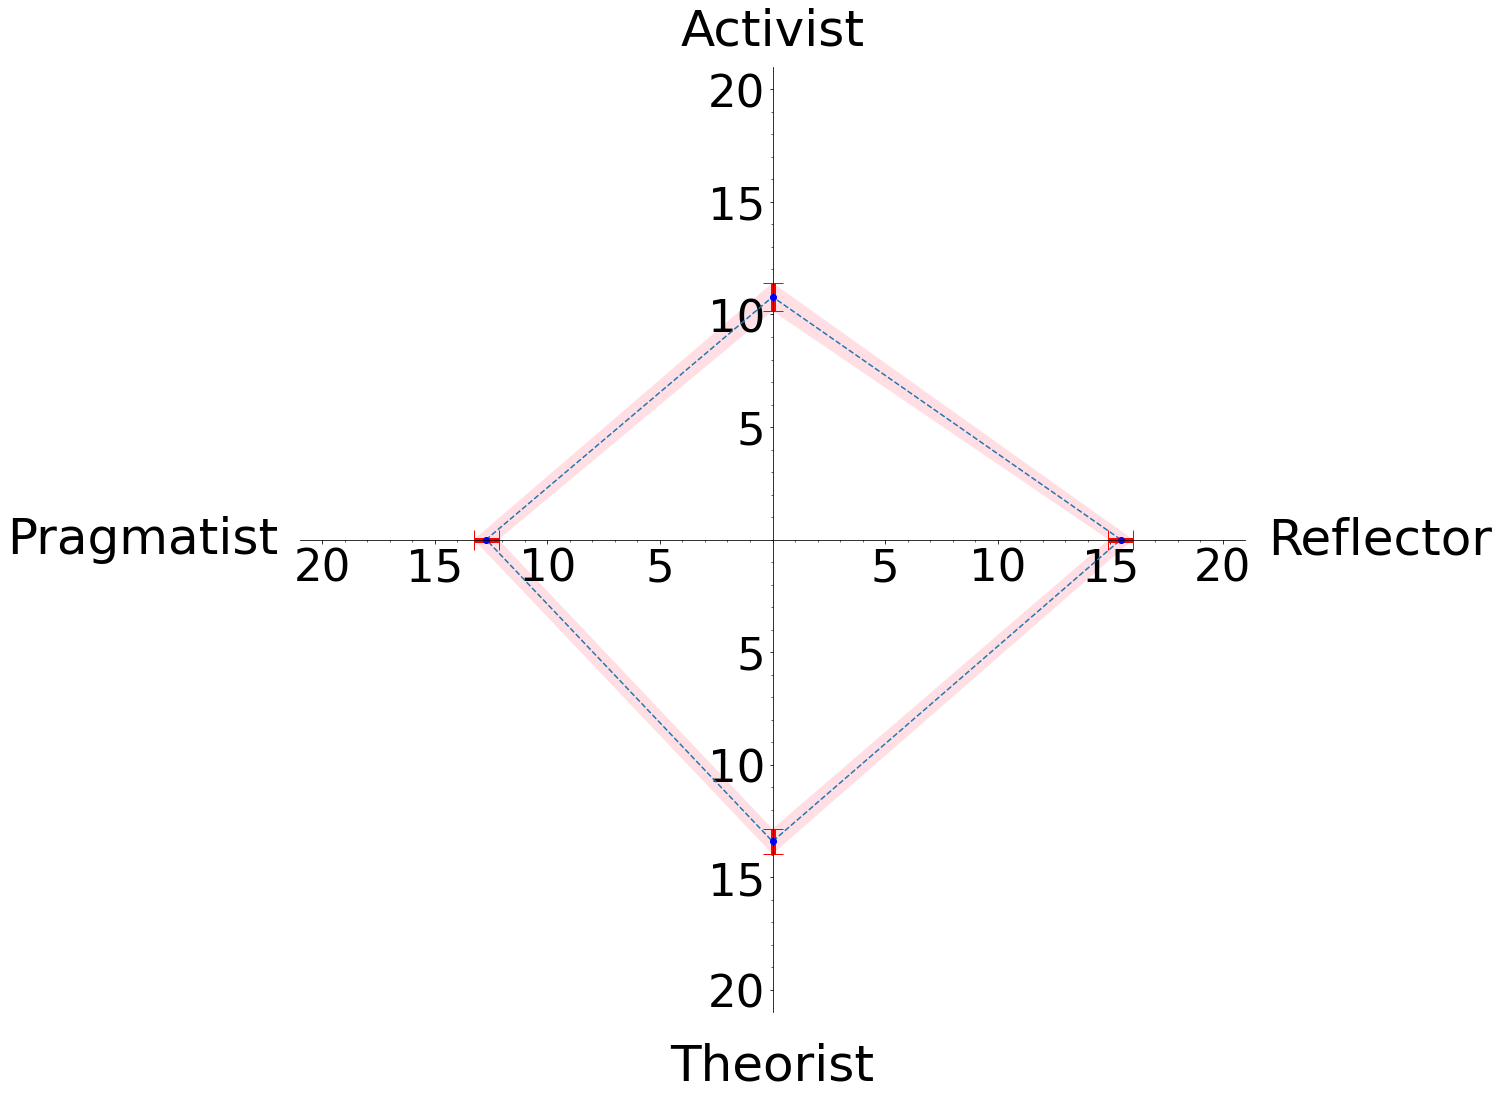

In [5]:
#===================================================
# AVERAGE MEAN AND UNCERTAINTIES
#===================================================
printt('===========================================')
printt('AVERAGE MEAN AND UNCERTAINTIES...')
printt('===========================================')
printt(' ')
#---------------------------------------------------
# Average mean
printt('-------------------------------------------')
printt(' Average mean...')
printt('-------------------------------------------')
shape = np.shape(data)
#
L = shape[0]
K = shape[1]
printt('  Input data size')
printt('    L :' + str(L))
printt('    K :' + str(K))
printt(' ')
#
# Size of the average value 0n the plots
size_mean = size_mean_ref / L
if ( size_mean < 1):
  size_mean = 4
else:
  if ( size_mean > 500):
    size_mean = 800
#
xamean = np.mean(xa)
xrmean = np.mean(xr)
xtmean = np.mean(xt)
xpmean = np.mean(xp)
#
xall     = np.concatenate( data )
xmeanall = np.mean(xall)
#
xmean = [xamean, xrmean, xtmean, xpmean]
#
printt('  Average mean')
printt('    mean(xa),    # : ' + str(xamean))
printt('    mean(xr),    # : ' + str(xrmean))
printt('    mean(xt),    # : ' + str(xtmean))
printt('    mean(xp),    # : ' + str(xpmean))
printt(' ')
printt('    mean(all),   # : ' + str(xmeanall))
printt('------------------------------------------')
printt(' Average mean done!')
printt('------------------------------------------')
printt(' ')
#
# Length of the eigfenvectors when plotted
# (in 2D and 3D) as a function of the LSs
distmeanmax = 30. - np.min( xmean )
#
#---------------------------------------------------
# Uncertainties
printt('------------------------------------------')
printt('  Uncertainties...')
printt('------------------------------------------')
# Create 95% confidence interval for population mean weight.
#
confidence_interval_ACT=st.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(xa), scale=st.sem(xa))
uncert_abs_ACT=0.5*(confidence_interval_ACT[1]-confidence_interval_ACT[0])
#
confidence_interval_REF=st.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(xr), scale=st.sem(xr)) 
uncert_abs_REF=0.5*(confidence_interval_REF[1]-confidence_interval_REF[0])
#
confidence_interval_THEO=st.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(xt), scale=st.sem(xt)) 
uncert_abs_THEO=0.5*(confidence_interval_THEO[1]-confidence_interval_THEO[0])
#
confidence_interval_PRA=st.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(xp), scale=st.sem(xp)) 
uncert_abs_PRA=0.5*(confidence_interval_PRA[1]-confidence_interval_PRA[0])
#
dxmean = [uncert_abs_ACT, uncert_abs_REF, uncert_abs_THEO, uncert_abs_PRA]
#
confidence_interval_ALL=st.t.interval(confidence=0.95, df=len(xall)-1, loc=np.mean(xall), scale=st.sem(xall)) 
uncert_abs_ALL=0.5*(confidence_interval_ALL[1]-confidence_interval_ALL[0])
#
printt('  Uncertainties')
printt('    Uncert(xa),  # : ' + str(uncert_abs_ACT))
printt('    Uncert(xr),  # : ' + str(uncert_abs_REF))
printt('    Uncert(xt),  # : ' + str(uncert_abs_THEO))
printt('    Uncert(xp),  # : ' + str(uncert_abs_PRA))
printt(' ')
printt('    Uncert(all), # : ' + str(uncert_abs_ALL))
printt('------------------------------------------')
printt(' Uncertainties done!')
printt('------------------------------------------')
printt(' ')
#---------------------------------------------------
# Average profile
printt('------------------------------------------')
printt(' Average profile...')
printt('------------------------------------------')
# Longitud de los ejes y espacios entre ticks.
xmin, xmax, ymin, ymax = -20, 20, -20, 20
ticks_frequency = 5
#
# Plot
fig, ax = plt.subplots(figsize = ( w_fig, h_fig )) 
#
# Coordenates (x, y) for the average mean
xs = [xrmean, 0, -xpmean,0]
ys = [0, xamean, 0, -xtmean]
ax.scatter(xs, ys)
#
# Connect the previous points
vertices_x=xs.copy()
vertices_x.append(xrmean)
vertices_y=ys.copy()
vertices_y.append(0)
#
# Average values
printt(' vertices_x : ' + str(vertices_x))
printt(' vertices_y : ' + str(vertices_y))
plt.plot(vertices_x, vertices_y, ls='--')
#
# Plot error barrs
printt(str(-xpmean-uncert_abs_PRA))
printt(str(xamean+uncert_abs_ACT))
printt(str(xpmean+uncert_abs_PRA))
#
#---------------------------------------------------
# Function that returns the value at x
# of a line that crosses points (x1, y1) and (x2, y2)
printt('-------------------------------------------')
printt('    Interpolating functions...')
printt('-------------------------------------------')
def line(x1, y1, x2, y2, x):
  m = (y2-y1)/(x2-x1)
  return y1 + m * ( x - x1 )  
#
ysupneg = line(-xpmean-uncert_abs_PRA, 0,
               0, xamean+uncert_abs_ACT,
               -xpmean+uncert_abs_PRA)
#
yinfneg = line(-xpmean-uncert_abs_PRA, 0,
               0, -xtmean-uncert_abs_THEO,
               -xpmean+uncert_abs_PRA)
#
ysuppos = line(xrmean+uncert_abs_REF, 0,
               0, xamean+uncert_abs_ACT,
               xrmean-uncert_abs_REF)
#
yinfpos = line(xrmean+uncert_abs_REF, 0,
               0, -xtmean-uncert_abs_THEO,
               xrmean-uncert_abs_REF)
#
printt('-------------------------------------------')
printt('    Interpolating functions done!')
printt('-------------------------------------------')
#---------------------------------------------------
printt(' ')
#
plt.fill_between([-xpmean-uncert_abs_PRA, -xpmean+uncert_abs_PRA, 0,
                   xrmean-uncert_abs_REF,  xrmean+uncert_abs_REF],
                 [0,  0, xamean-uncert_abs_ACT,  0, 0],
                 [0,  ysupneg, xamean+uncert_abs_ACT, ysuppos, 0],
                 facecolor='pink', alpha=0.5)
#
plt.fill_between([-xpmean-uncert_abs_PRA, -xpmean+uncert_abs_PRA, 0,
                   xrmean-uncert_abs_REF,  xrmean+uncert_abs_REF],
                 [0, yinfneg, -xtmean-uncert_abs_THEO, yinfpos, 0],
                 [0,  0, -xtmean+uncert_abs_THEO, 0, 0],
                 facecolor='pink', alpha=0.5)
#
x_error=[uncert_abs_REF,0,uncert_abs_PRA,0]
y_error=[0,uncert_abs_ACT,0,uncert_abs_THEO]
#
plt.errorbar(xs, ys, xerr = x_error, yerr=y_error, fmt='o', ecolor = 'red',color='blue',elinewidth = 5, capsize=10)
#
# Same scale for all axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
#
# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
#
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#
# Create 'x' and 'y' labels placed at the end of the axes
plt.text(0,  22, Label_LS[0], fontsize=labelsize, horizontalalignment='center')
plt.text( 22, 0, Label_LS[1], fontsize=labelsize, verticalalignment  ='center')
plt.text(0, -24, Label_LS[2], fontsize=labelsize, horizontalalignment='center')
plt.text(-34, 0, Label_LS[3], fontsize=labelsize, verticalalignment  ='center')
#
# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])
#
# Rename negative parts of the axes
labels = [item.get_text() for item in ax.get_xticklabels()]
printt('labels : ' + str(labels))
labels[0] = 20
labels[1] = 15
labels[2] = 10
labels[3] = 5
ax.set_xticklabels(labels)
#
labels = [item.get_text() for item in ax.get_yticklabels()]
printt('labels : ' + str(labels))
labels[0] = 20
labels[1] = 15
labels[2] = 10
labels[3] = 5
ax.set_yticklabels(labels)
#
# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)
#
ax.tick_params(axis='both', which='both', labelsize = ticksize)
# Draw major and minor grid lines
#ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
#
#plt.show()
filename_average_profile=output_statistics_ls + '/Fig_averageprofile.png'
printt('Saving ' + filename_average_profile)
plt.savefig(filename_average_profile)
printt(' ')
printt('------------------------------------------')
printt(' Average profile done!')
printt('------------------------------------------')
printt(' ')
printt('===========================================')
printt('AVERAGE MEAN AND UNCERTAINTIES DONE!')
printt('===========================================')

=========================================== TENDENCIES... ===========================================   -------------------------------------------  Tendencies in %... ------------------------------------------- 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128   Activist learning style     Tendency      No.     %    Very low    18   14.0    Low         12   9.3    Moderate    55   42.6    High        23   17.8    Very high   21   16.3     Reflector learning style     Tendency      No.     %    Very low    6   4.7    Low         25   19.4    Moderate    65   50.4    High        28   21.7    Very high   5   3.9     Theorist learning styl

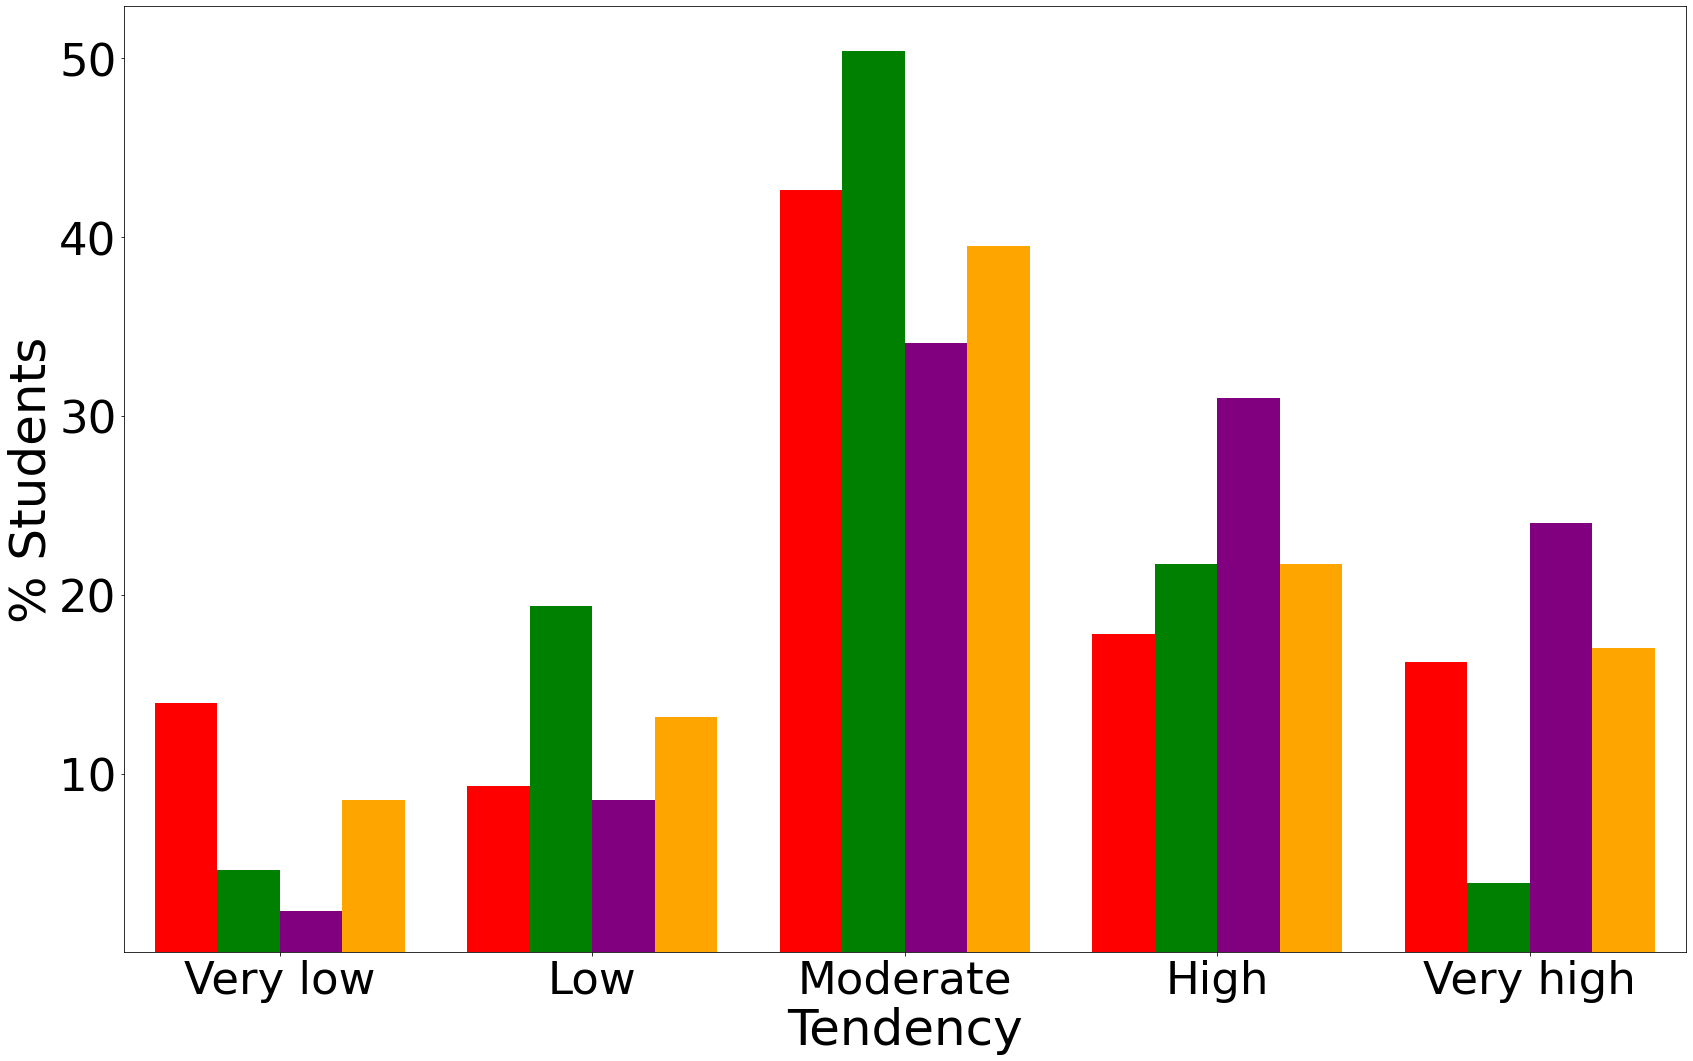

In [6]:
#===================================================
# TENDENCIES TO THE DIFFERENT LSs
#===================================================
printt('===========================================')
printt('TENDENCIES...')
printt('===========================================')
printt(' ')
#---------------------------------------------------
# Average mean
printt('-------------------------------------------')
printt(' Tendencies in %...')
printt('-------------------------------------------')
# Matrix with the tendencies (very low, low,
# moderate, high and very high) towards the
# different LSs.
# Each line is associated with a different LS.
# Each column corresponds to a different
# tendency.
tendency_matrix     = np.zeros((K, 5))
tendency_matrix_all = [['' for _ in range(K)] for _ in range(L)]
tendency_vector  = ['', '', '', '', '']
#
for i in range(0,L):
  printt(str(i))
  tendency_vector[0] = scatter_tendency('Activist',   xa[i])
  tendency_vector[1] = scatter_tendency('Reflector',  xr[i])
  tendency_vector[2] = scatter_tendency('Theorist',   xt[i])
  tendency_vector[3] = scatter_tendency('Pragmatist', xp[i])
#
  tendency_matrix_all[i][0] = tendency_vector[0]
  tendency_matrix_all[i][1] = tendency_vector[1]
  tendency_matrix_all[i][2] = tendency_vector[2]
  tendency_matrix_all[i][3] = tendency_vector[3]
#
  for j in range(0,K):
    if ( tendency_vector[j] == 'vl' ) :
      tendency_matrix[j,0] = tendency_matrix[j,0] + 1
    else:
      if ( tendency_vector[j] == 'l' ) :
        tendency_matrix[j,1] = tendency_matrix[j,1] + 1
      else:
        if ( tendency_vector[j] == 'm' ) :
          tendency_matrix[j,2] = tendency_matrix[j,2] + 1
        else:
          if ( tendency_vector[j] == 'h' ) :
            tendency_matrix[j,3] = tendency_matrix[j,3] + 1
          else:
            if ( tendency_vector[j] == 'vh' ) :
              tendency_matrix[j,4] = tendency_matrix[j,4] + 1
#
#printt( '  Tendency matrix     : ', tendency_matrix)              
tendency_matrix_percentage = tendency_matrix * 100 / L
#printt( '  Tendency matrix (%) : ', tendency_matrix_percentage)
#printt(' ')
#
for i in range(0,K):
  printt('  ' + Label_LS[i] + ' learning style')
  printt('    Tendency      No.     %')
  for j in range(0,len(Label_tendencies)):
    printt('   ' + Label_tendencies_print[j] + '   ' + str(int(tendency_matrix[i, j])) + '   ' + str(round(tendency_matrix_percentage[i, j], 1)))
  printt(' ')
#
printt('Learning Style ' + Label_tendencies_print[0] + Label_tendencies_print[1] +
                         Label_tendencies_print[2]   +
                         Label_tendencies_print[3]   + Label_tendencies_print[4])
printt('                No.  %    No.  %    No.  %    No.  %    No.  %')
for i in range(0,K):
  printt('  ' + Label_LS_print[i] + ' ' + str(int(tendency_matrix[i, 0])) + str(round(tendency_matrix_percentage[i, 0], 1))  + '   ' + str(int(tendency_matrix[i, 1])) + str(round(tendency_matrix_percentage[i, 1], 1)) + '   ' + str(int(tendency_matrix[i, 2])) + str(round(tendency_matrix_percentage[i, 2], 1)) + '   ' + str(int(tendency_matrix[i, 3])) + str(round(tendency_matrix_percentage[i, 3], 1)) + '   ' + str(int(tendency_matrix[i, 4])) + str(round(tendency_matrix_percentage[i, 4], 1)) )
printt(' ')
#
Ntot_tendency    = np.zeros(len(Label_tendencies))
percent_tendency = np.zeros(len(Label_tendencies))
#
for j in range(0,len(Label_tendencies)):
  for i in range(0,K):
    Ntot_tendency[j]    = Ntot_tendency[j] + tendency_matrix[i, j]
    percent_tendency[j] = percent_tendency[j] + tendency_matrix[i, j] * tendency_matrix_percentage[i, j]  
#
  percent_tendency[j] = percent_tendency[j] / Ntot_tendency[j]
#
printt('   Average    ' + str(int(Ntot_tendency[0])) + str(round(percent_tendency[0], 1)) + '   ' + str(int(Ntot_tendency[1])) + str(round(percent_tendency[1], 1)) + '   ' + str(int(Ntot_tendency[2])) + str(round(percent_tendency[2], 1)) + '   ' + str(int(Ntot_tendency[3])) + str(round(percent_tendency[3], 1)) + '   ' + str(int(Ntot_tendency[4])) + str(round(percent_tendency[4], 1)))
#
fig, ax = plt.subplots(figsize = ( w_fig, h_fig )) #, layout='constrained')
#
ymax = np.max(tendency_matrix_percentage)
#
# Fill areas below the curve
for j in range(0,K):
  for i in range(0,len(Label_tendencies)):
#
    percentage = tendency_matrix_percentage[j,i]
    xmin_percentage = -2+i+(j-2)*0.2
    xmax_percentage = xmin_percentage + 0.2
    plt.fill_between([xmin_percentage, xmax_percentage], [percentage, percentage], facecolor = LS_color[j], alpha = LS_alpha3)  
#
# Tick parameters
# x = np.arange(len(Label_tendencies))
  ax.set_xticks([-2, -1, 0, 1, 2], Label_tendencies)
  ax.tick_params(axis='both', which='major', labelsize = ticksize_quartile)
#
# Labels
  ax.set_xlabel('Tendency',   fontsize = labelsize_quartile)
  ax.set_ylabel('% Students', fontsize = labelsize_quartile)
#
ymax = ymax*1.05
ax.set_xlim( [ -2.5, 2.5] )
ax.set_ylim( [ 0.05, ymax] )
#
filename_tendencies=output_statistics_ls + '/Fig_tendencies.png'
printt('Saving ' + filename_tendencies)
plt.savefig(filename_tendencies)
printt('------------------------------------------')
printt(' Tendencies done!')
printt('------------------------------------------')
printt(' ')
#
printt('===========================================')
printt('TENDENCIES DONE!')
printt('===========================================')

=========================================== AFFINITY... ===========================================   -------------------------------------------  Affinity in %... -------------------------------------------    Learning style     %   Activist      76.7   Reflector     76.0   Theorist      89.1   Pragmatist    78.3    Average        85.3   Saving /home/frp/ownCloud/articulos_fabio/2_tex/AAA_submitted/educacion/learning_styles_JSciEduTech/4_chaea3s/chaea3s_paachaea/chaea3s/output/figs//statistics/ls/Fig_affinity.png ------------------------------------------  Tendencies done! ------------------------------------------   =========================================== AFFINITY DONE! =========================================== 

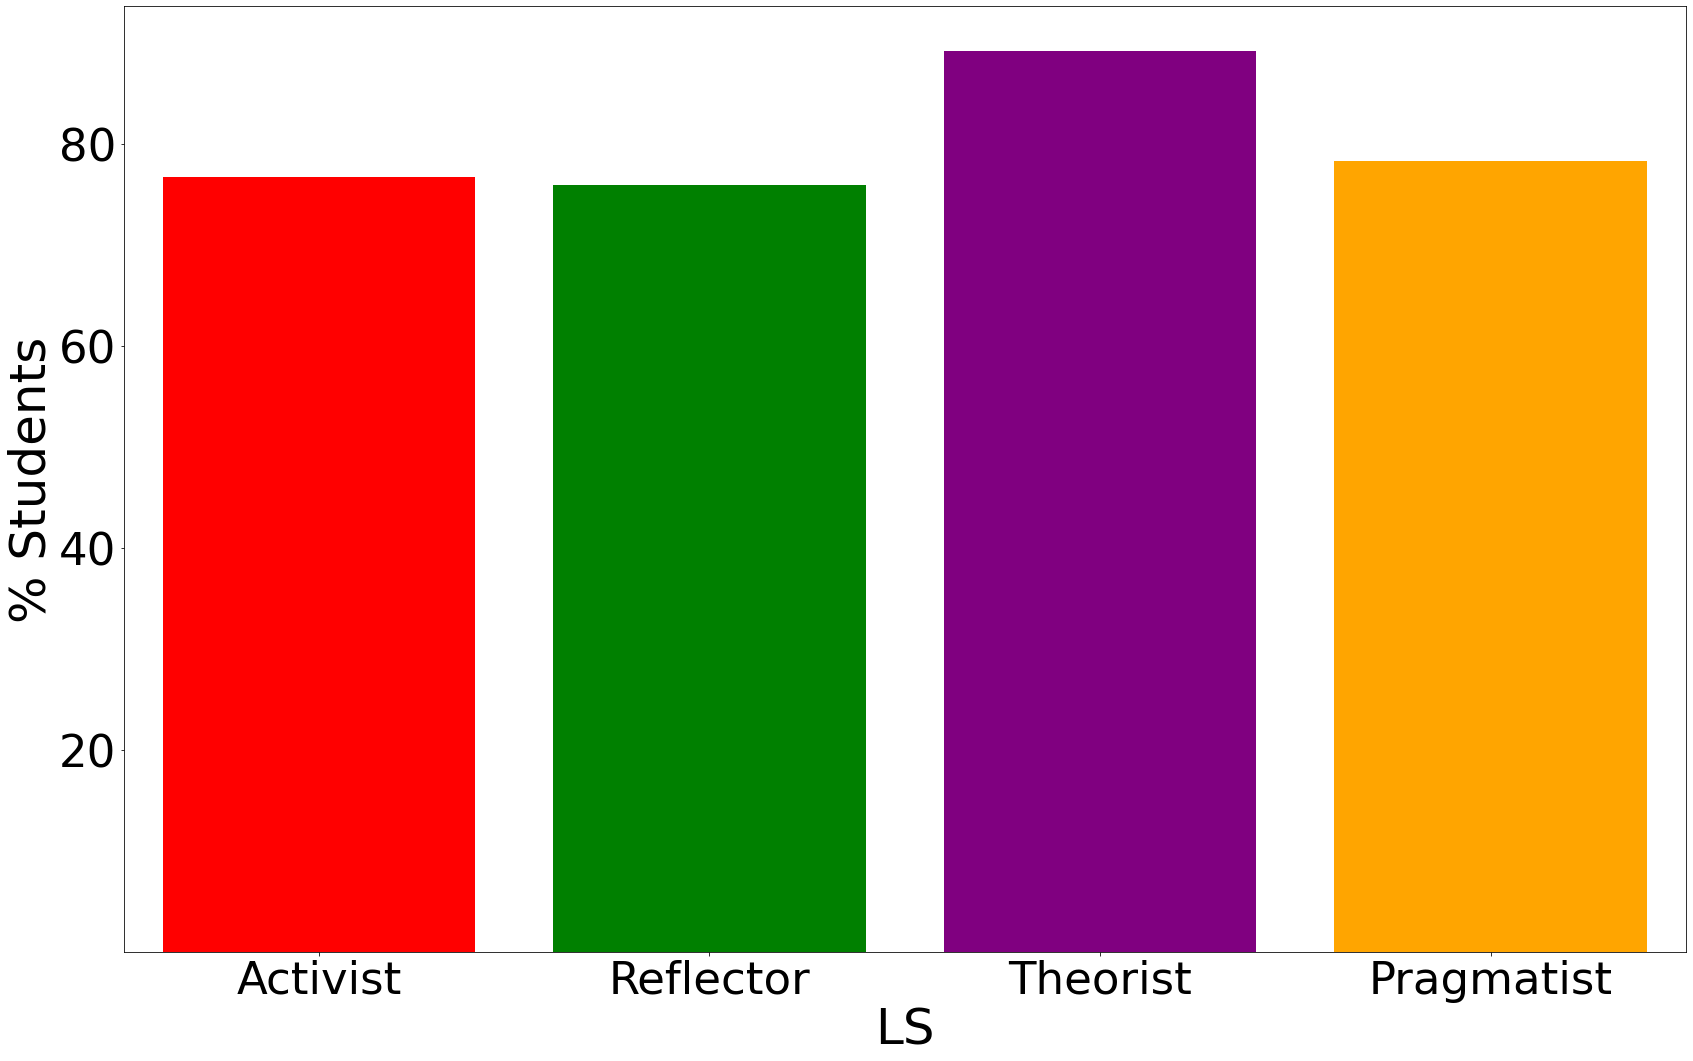

In [7]:
#===================================================
# AFINITY
#===================================================
printt('===========================================')
printt('AFFINITY...')
printt('===========================================')
printt(' ')
#---------------------------------------------------
printt('-------------------------------------------')
printt(' Affinity in %...')
printt('-------------------------------------------')
#
affinity  = np.zeros(K)
#
for i in range(0,K):
  for j in range(2,len(Label_tendencies)):
    affinity[i] = affinity[i] + tendency_matrix_percentage[i,j] 
#
#printt( 'Affinity : ', affinity)
#
fig, ax = plt.subplots(figsize = ( w_fig, h_fig )) #, layout='constrained')
#
ymax = np.max(affinity)
#
# Fill areas below the curve
printt( '   Learning style     %')
for j in range(0,K):
  printt( '  ' + Label_LS_print[j] + '    ' + str(round(affinity[j], 1)))
  plt.fill_between([j-0.4, j+0.4], [affinity[j], affinity[j]], facecolor = LS_color[j], alpha = affinity_alpha)  
#
# Tick parameters
  x = np.arange(len(Label_LS))
  ax.set_xticks(x, Label_LS)
  ax.tick_params(axis='both', which='major', labelsize = ticksize_quartile)
#
# Labels
  ax.set_xlabel('LS',           fontsize = labelsize_quartile)
  ax.set_ylabel('% Students', fontsize = labelsize_quartile)
#
printt( '   Average        ' + str(round(percent_tendency[2]+percent_tendency[3]+percent_tendency[4], 1)))
#
ymax = ymax*1.05
ax.set_xlim( [ -0.5, 3.5] )
ax.set_ylim( [ 0.05, ymax] )
#
printt(' ')
filename_affinity=output_statistics_ls + '/Fig_affinity.png'
printt('Saving ' + filename_affinity)
plt.savefig(filename_affinity)
printt('------------------------------------------')
printt(' Tendencies done!')
printt('------------------------------------------')
printt(' ') 
#
printt('===========================================')
printt('AFFINITY DONE!')
printt('===========================================')

In [8]:
#===================================================
# PROBABILITIES IN THE ORIGINAL LS BASIS SET
#===================================================
#
printt('-------------------------------------------')
printt(' Probability of each student on the LSs...')
printt('-------------------------------------------')
printt(' ')
# Calculate the probability to have a
# certain LS for each student
probLS = np.zeros((L,K))
#
for i in range(0,L):
  normLSj2 = 0
  for j in range(0,K):
    normLSj2 = normLSj2 + data[i,j]*data[i,j]
#
# Compute the probability
# (it is set to zero if the vector is zero)
  for j in range(0,K):
    if ( normLSj2 > 0):
      probLS[i, j] = 100 * data[i,j] * data[i,j] / normLSj2
#
printt('   data   : ' + str(data))
printt(' ')
printt('   probLS : ' + str(probLS))
printt(' ')
# Mean values and uncertainties of the probabilities
probLSmean = np.array([np.mean(probLS[:,0]), np.mean(probLS[:,1]), np.mean(probLS[:,2]), np.mean(probLS[:,3])])
#
uncert_abs_probLS = [0, 0, 0, 0]
for j in range(0,K):
  probj = probLS[:,j]
  confidence_interval_probLS=st.t.interval(confidence=0.95, df=len(probj)-1, loc=probLSmean[j], scale=st.sem(probj)) 
  uncert_abs_probLS[j]=0.5*(confidence_interval_probLS[1]-confidence_interval_probLS[0])
#
printt('  The mean values of the corresponding probabilities')
printt('  do not nullify (as all of them are positive or zero)')
printt('    probLSmean     : ' + str(probLSmean))
printt('    Uncert(probLS) : ' + str(uncert_abs_probLS))
printt(' ')
#
printt(' Probability of each student on the LSs done!')
printt('-------------------------------------------')
printt(' ')
printt(' ')
printt('===========================================')
printt('PROBABILITIES IN ORIGINAL BASIS DONE!')
printt('===========================================')

-------------------------------------------  Probability of each student on the LSs... -------------------------------------------      data   : [[14. 14. 14. 15.]
 [13. 18. 12. 10.]
 [13. 15. 14. 13.]
 [ 9. 17. 13.  8.]
 [15. 18. 12. 13.]
 [17. 13. 16. 12.]
 [14. 17. 11. 11.]
 [ 8. 18. 20. 15.]
 [ 6. 15. 15. 12.]
 [14. 16. 12. 14.]
 [17. 15. 19. 18.]
 [17. 15. 13. 17.]
 [ 6. 17.  8.  9.]
 [10. 13. 11. 10.]
 [ 9. 16. 12. 13.]
 [ 9. 19. 14. 13.]
 [10. 16. 15. 16.]
 [10. 12. 13. 13.]
 [15. 16. 11. 15.]
 [15. 13. 11. 19.]
 [11. 18. 17. 12.]
 [10. 12. 13. 16.]
 [12. 15. 13. 10.]
 [13. 16. 11. 11.]
 [13. 19. 15. 14.]
 [ 9. 16. 12. 14.]
 [15. 19.  9. 15.]
 [10.  9. 11. 14.]
 [15. 10. 13. 20.]
 [16. 18.  8.  9.]
 [10. 15. 11. 14.]
 [ 8. 15. 12. 13.]
 [10. 15.  8.  7.]
 [ 4. 20. 18. 13.]
 [ 9. 19. 11. 19.]
 [11. 15. 16. 16.]
 [11. 17. 15. 12.]
 [ 9. 16. 14. 13.]
 [12. 15. 13. 14.]
 [14. 13. 15. 12.]
 [ 8. 18. 12. 12.]
 [11. 15. 10. 10.]
 [ 8. 19. 19. 15.]
 [12. 16. 13. 12.]
 [ 5. 19. 17. 11.]


=========================================== STATISTICAL ANALYSIS LS ORIGINAL BASIS... ===========================================   -------------------------------------------  Analysis of the cumulative probability  distribution (W(prob)) of the probabilities  of the different LSs (plot and fitting  using a Weibull distribution)... -------------------------------------------   -------------------------------------------  W(LS)... -------------------------------------------    LS 0-20 :Activist     (array([12.19654936,  3.48272398]), array([[ 0.00103856, -0.00036492],
       [-0.00036492,  0.00248118]]))     alpha_Weibull : 12.196549356324013     k_Weibull     : 3.4827239830655223      LS 0-20 :Reflector     (array([16.7755403 ,  6.97352239]), array([[ 0.00099916, -0.001018  ],
       [-0.001018  ,  0.0210389 ]]))     alpha_Weibull : 16.775540303332953     k_Weibull     : 6.97352239065378      LS 0-20 :Theorist     (array([14.70449264,  5.48493817]), array([[ 0.00099017, -0.00080297],


/tmp/ipykernel_18064/928990034.py:520: RuntimeWarning: divide by zero encountered in power
  return 1 - np.exp(-(x/alpha_Weibull)**k_Weibull)
/tmp/ipykernel_18064/928990034.py:520: RuntimeWarning: invalid value encountered in power
  return 1 - np.exp(-(x/alpha_Weibull)**k_Weibull)


-------------------------------------------  Probabilities of the LSs done! -------------------------------------------   =========================================== STATISTICAL ANALYSIS LS ORIGINAL BASIS DONE! =========================================== 

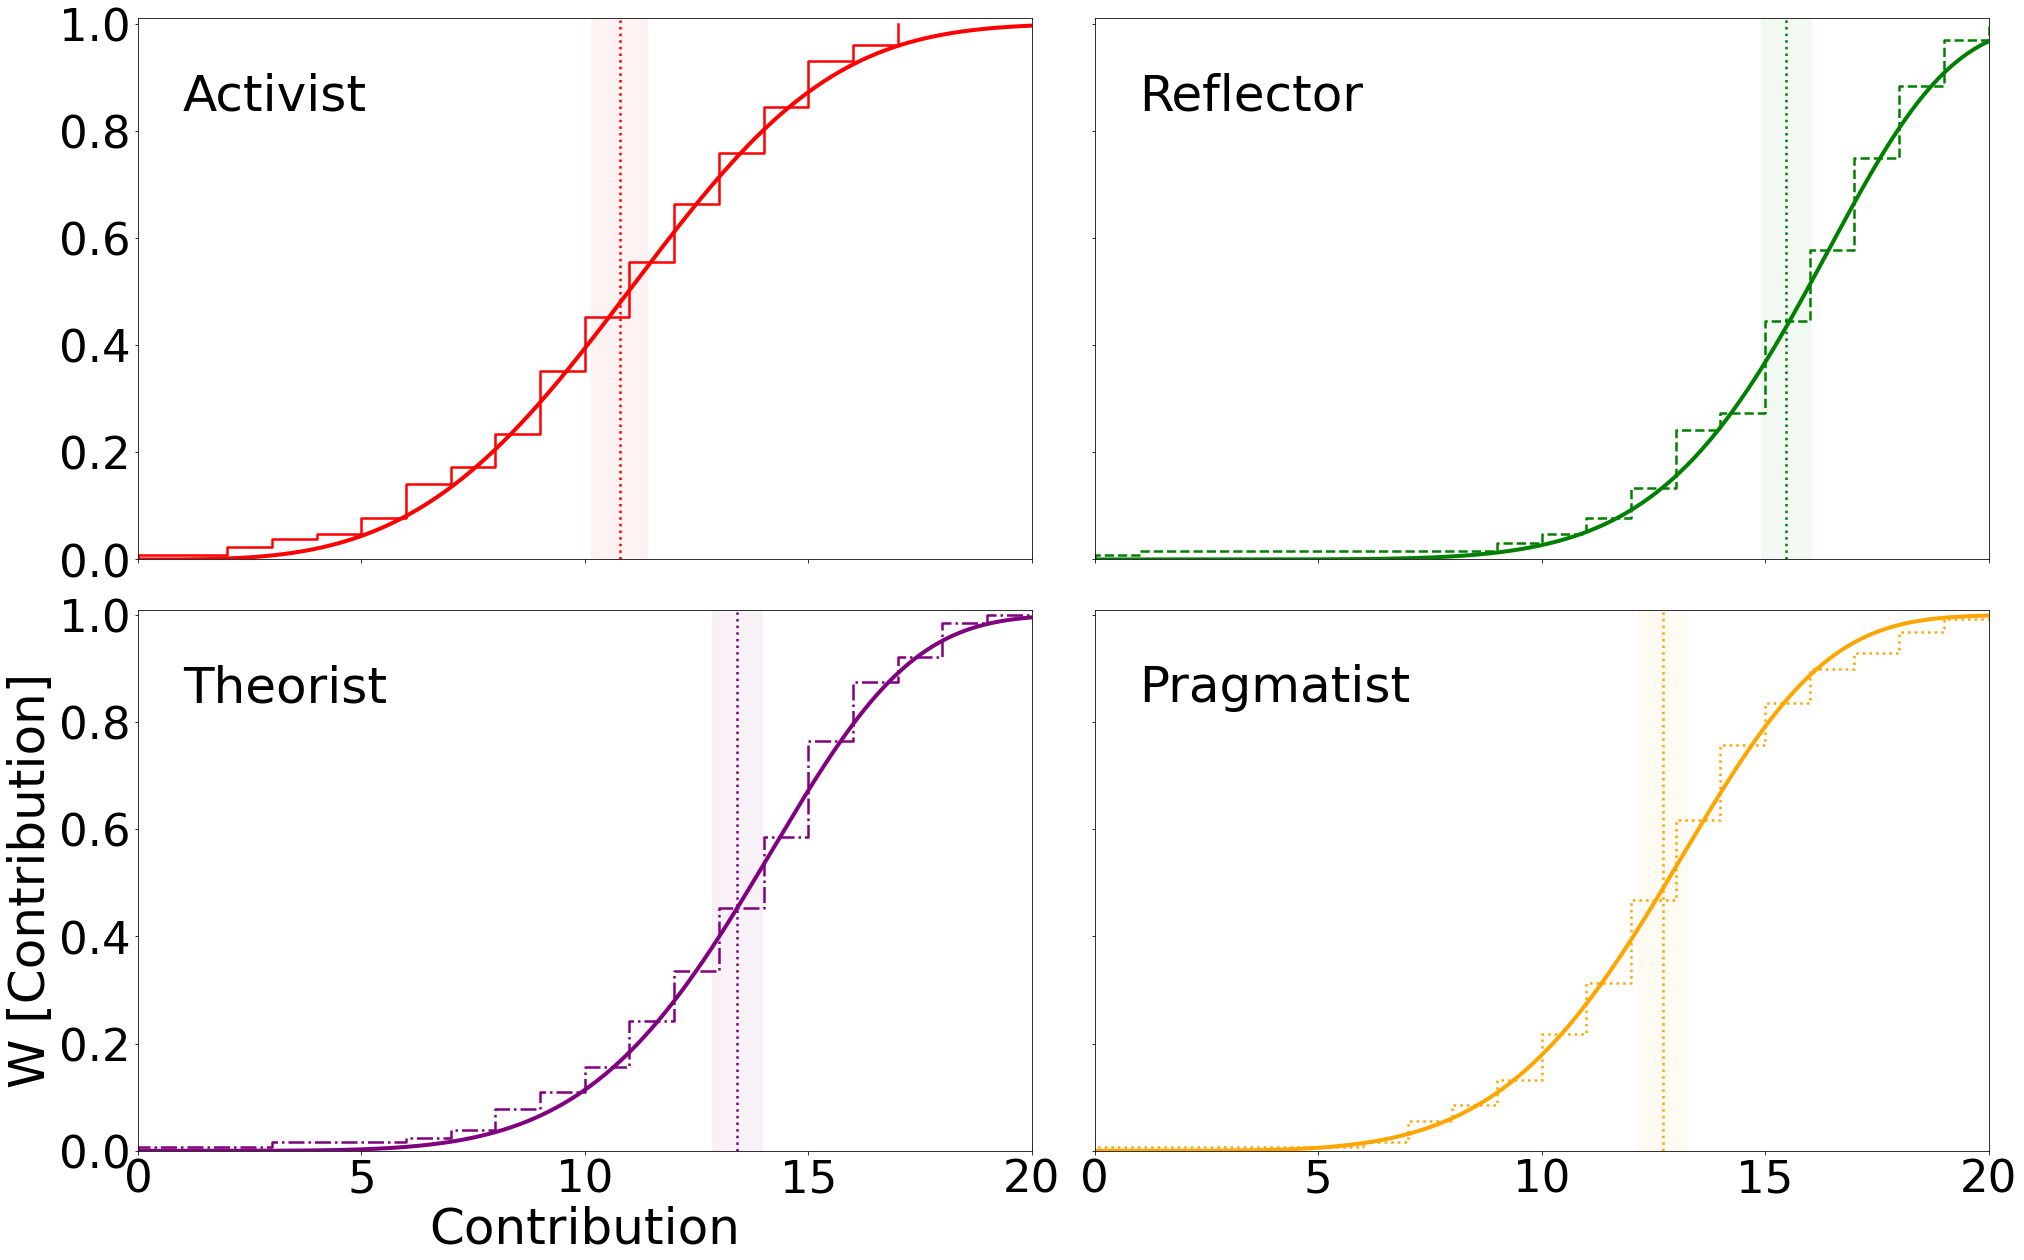

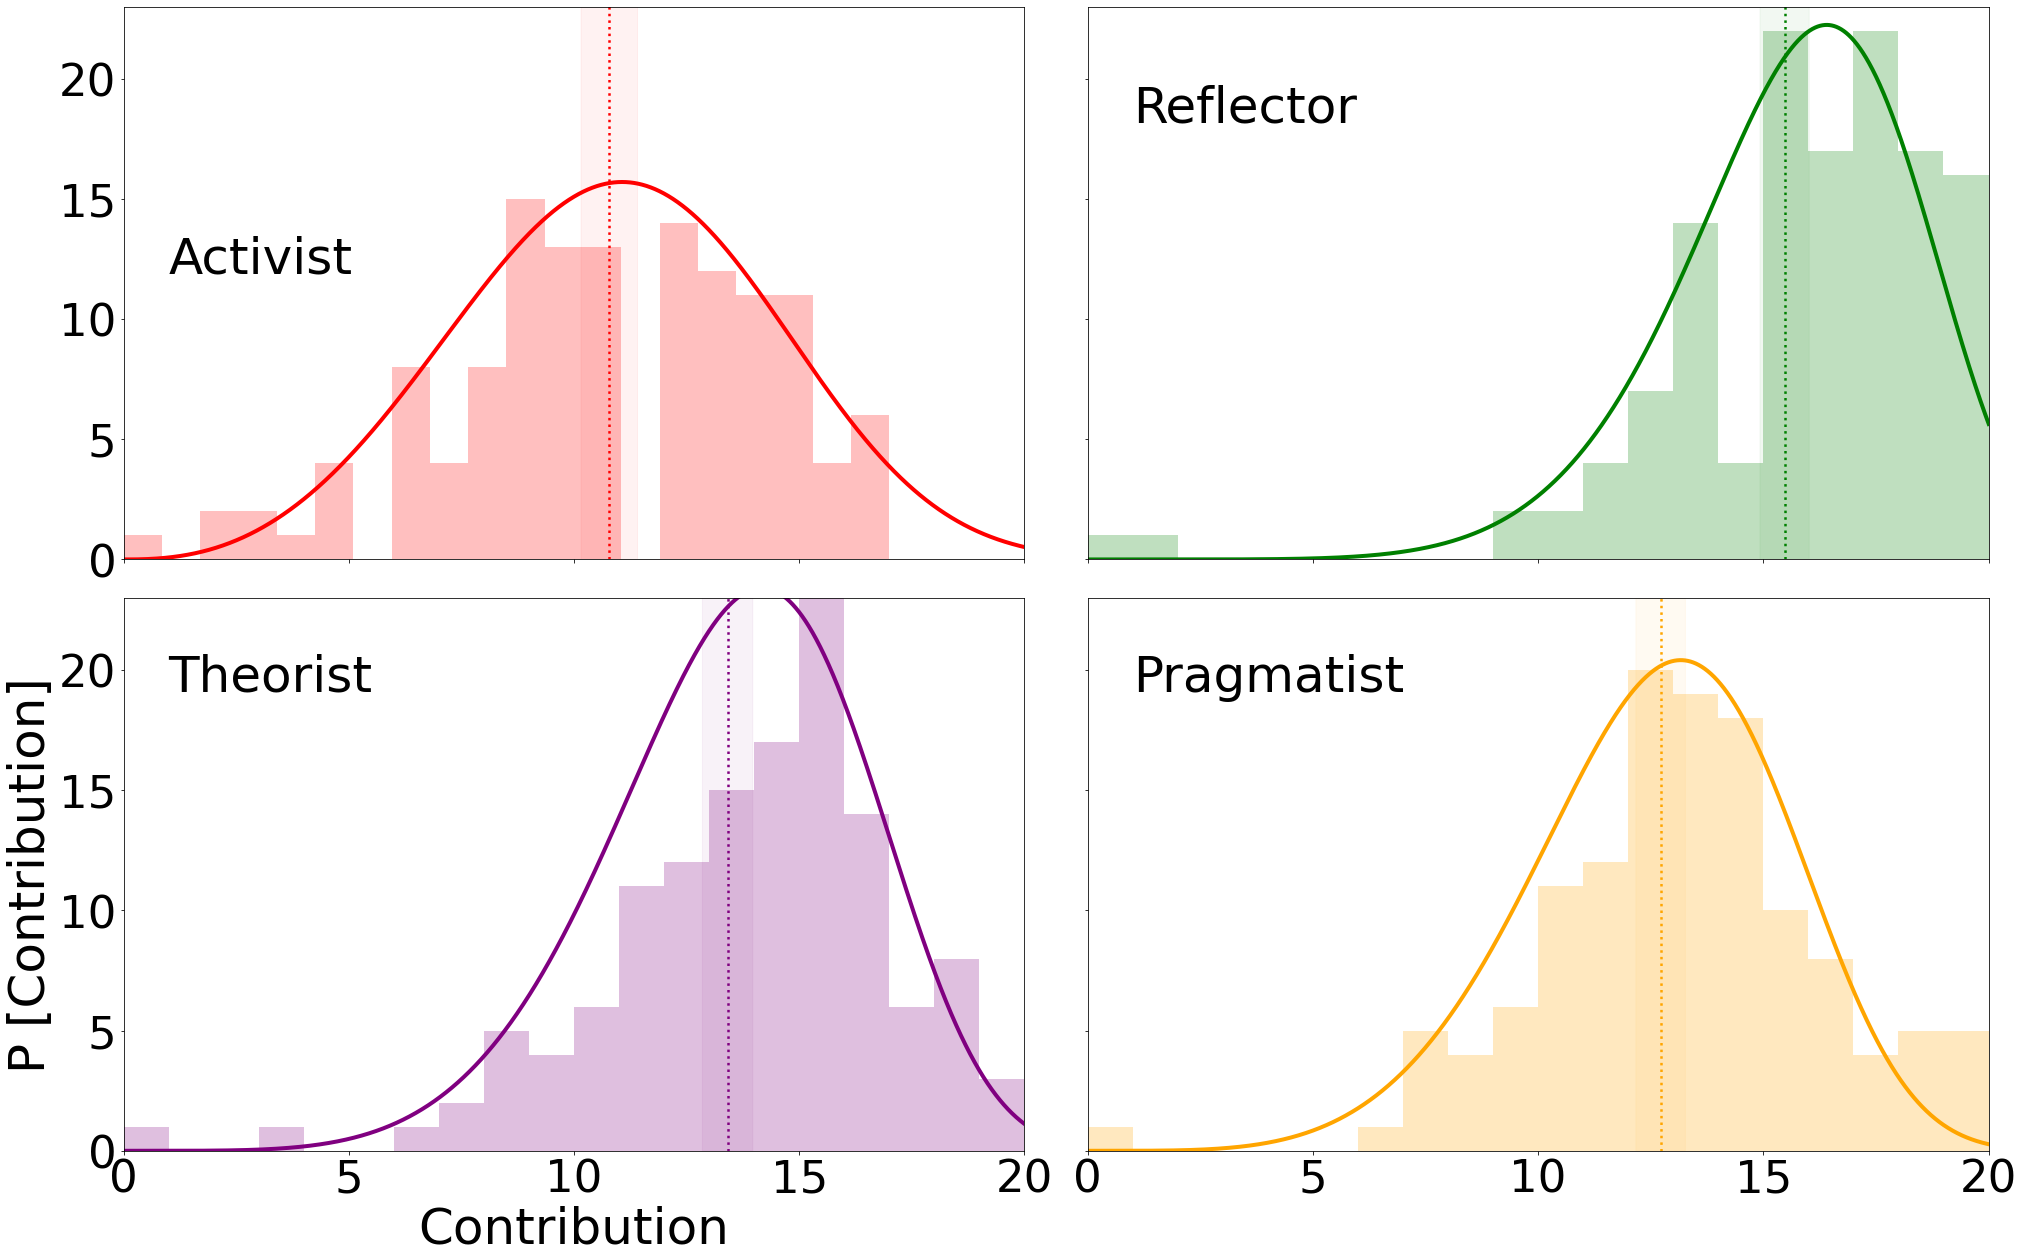

In [9]:
#===================================================
# STATISTICAL ANALYSIS IN THE LS ORIGINAL BASIS
#===================================================
printt('===========================================')
printt('STATISTICAL ANALYSIS LS ORIGINAL BASIS...')
printt('===========================================')
printt(' ')
#---------------------------------------------------
printt('-------------------------------------------')
printt(' Analysis of the cumulative probability')
printt(' distribution (W(prob)) of the probabilities')
printt(' of the different LSs (plot and fitting')
printt(' using a Weibull distribution)...')
printt('-------------------------------------------')
printt(' ')
printt('-------------------------------------------')
printt(' W(LS)...')  
printt('-------------------------------------------')
xWeib   = np.arange(0,20.1, 0.001)
#
ymin  = 0
ymax  = 1.01
ymaxx = 10000000000
#
parameters_Weibull_LS20 = np.zeros((K,2))
#
for ils in range(0, K):
  printt('   LS 0-20 :' + Label_LS[ils])
  x = data[:, ils]
  x = np.sort(x)
#
  y = np.zeros(L)
  y[0] = 0
  dy = 1 / float(L-1)
  for i in range(1,L):
    y[i] = y[i-1] + dy
#
# Fitting using Weibull distribution
  param = curve_fit(Wweibull, x, y, [xmean[ils], 1], maxfev = max_iter_Weib)
  printt('    ' + str(param))
  [alpha_Weibull, k_Weibull] = param[0]
  parameters_Weibull_LS20[ils] = [alpha_Weibull, k_Weibull]
  printt('    alpha_Weibull : ' + str(alpha_Weibull))
  printt('    k_Weibull     : ' + str(k_Weibull))  
  printt(' ')
#
# Create a figure with 4 panels,
# each one related to a different LS
fig, axs = plt.subplots(2, 2, figsize = ( w_fig, h_fig ), sharex = True, sharey = True, layout='constrained')  
#
panels = [[0, 0], [0, 1], [1, 0], [1, 1]]
#
for ils in range(0, K):
  printt('   LS 0-20 :' + Label_LS[ils])
  x = data[:, ils]
  x = np.sort(x)
#
  y = np.zeros(L)
  y[0] = 0
  dy = 1 / float(L-1)
  for i in range(1,L):
    y[i] = y[i-1] + dy
#
# Staircase
  x2 = np.zeros(2*L+2)
  y2 = np.zeros(2*L+2)
  x2[0]  =   0
  y2[0]  =   0
  x2[2*L+1] = x[L-1]
  y2[2*L+1] = 1
#
# Fitting using Weibull distribution
  [alpha_Weibull, k_Weibull] = parameters_Weibull_LS20[ils]
  printt('    alpha_Weibull : ' + str(alpha_Weibull))
  printt('    k_Weibull     : ' + str(k_Weibull))  
  printt(' ')
#
  for i in range(0,L):
    x2[2*i+1] = x[i]
    x2[2*i+2] = x[i]

    y2[2*i+1] = y[i]
    y2[2*i+2] = y[i] + dy
  y2[2*L] = 1    
#
# Find the points close to 5, 10, and 15
# in order to correcly color the
# LS that lie in the ranges [0, 5), 
# (10, 15), and (15,20]
  ic   = [-1,  -1, -1]
  xc   = [ 0,  5, 10]
  xref = [ 5, 10, 15]
#
  for i in range(0,len(ic)):
    for j in range(0, L):
      if( x[j] > xc[i] and x[j] < xref[i] ):
        ic[i] = j
        xc[i] = x[j]
#
  axs[panels[ils][0], panels[ils][1]].set_xlim( [ 0, 20] )
  axs[panels[ils][0], panels[ils][1]].set_ylim( [ ymin, ymax] )
#
  axs[panels[ils][0], panels[ils][1]].tick_params(axis='both', which='major', labelsize = ticksize_PC)
#
  axs[panels[ils][0], panels[ils][1]].plot(x2, y2,                                 lw = PC_width,   color = PC_color[ils], ls = PC_line[ils])
  axs[panels[ils][0], panels[ils][1]].plot(xWeib,Wweibull(xWeib, alpha_Weibull, k_Weibull) , lw = PC_W_width, color = PC_color[ils], ls = PC_line_bis[ils])  
#
# Plot the average value as a vertical line
# we do not plot the uncertainties as they can be very large
  axs[panels[ils][0], panels[ils][1]].plot([xmean[ils] , xmean[ils] ], [ymin, ymaxx], lw = LS_mean_width, color = LS_color[ils], ls = LS_mean_line)
  axs[panels[ils][0], panels[ils][1]].fill_between([xmean[ils]-dxmean[ils], xmean[ils]+dxmean[ils]], [ymin, ymaxx], color = LS_color[ils], alpha = LS_mean_alpha )
#      
# Text label
  axs[panels[ils][0], panels[ils][1]].text(20*0.05, 0.9*ymax, Label_LS[ils],
        fontsize = labelsize,
        horizontalalignment='left',
        verticalalignment='top')
#
axs[1, 0].tick_params(axis='both', which='major', labelsize=ticksize)
#
axs[1, 0].set_xlabel('Contribution', fontsize=labelsize)
axs[1, 0].set_ylabel('W [Contribution]', fontsize=labelsize)
#
filename_statistics_ls_w = output_statistics_ls + '/Fig_LS20_W2.png'
printt('Saving ' + filename_statistics_ls_w)
plt.savefig(filename_statistics_ls_w)
#
printt('-------------------------------------------')
printt(' W(LS) done!')  
printt('-------------------------------------------')
printt(' ')
#
printt('-------------------------------------------')
printt(' W(probLS)...')  
printt('-------------------------------------------')
xWeib   = np.arange(0, 1.1, 0.001)
parameters_Weibull_LS = np.zeros((K,2))
#
for ils in range(0, K):
  printt('   LS :' + Label_LS[ils])
  x = probLS[:, ils] / 100
  x = np.sort(x)
#
  y = np.zeros(L)
  y[0] = 0
  dy = 1 / float(L-1)
  for i in range(1,L):
    y[i] = y[i-1] + dy
#
# Fitting using Weibull distribution
  param = curve_fit(Wweibull, x, y, [probLSmean[ils], 1], maxfev = max_iter_Weib)
  printt('    ' + str(param))
  [alpha_Weibull, k_Weibull] = param[0]
  parameters_Weibull_LS[ils] = [alpha_Weibull, k_Weibull]
  printt('    alpha_Weibull : ' + str(alpha_Weibull))
  printt('    k_Weibull : ' + str(k_Weibull))
  printt(' ')
#
printt('-------------------------------------------')
printt(' W(probLS) done!')  
printt('-------------------------------------------')
printt(' ')
#
#---------------------------------------------------
printt('-------------------------------------------')
printt(' Probabilities of the LSs...')
printt('-------------------------------------------')
#
xWeib   = np.arange(0, 120, 0.005)
#
ymin  = 0
ymax  = 1.01
ymaxtot = 0
ymaxx   = 10000000000
#
# Create a figure with 4 panels,
# each one related to a different LS
fig, axs = plt.subplots(2, 2, figsize = ( w_fig, h_fig ), sharex = True, sharey = True, layout='constrained')  
#
panels = [[0, 0], [0, 1], [1, 0], [1, 1]]
#
for ils in range(0, K):
  printt('   LS 0-20 :' + Label_LS[ils])
#
  x = data[:, ils]
  x = np.sort(x)
#
  [alpha_Weibull, k_Weibull] = parameters_Weibull_LS20[ils]
  printt('    alpha_Weibull : ' + str(alpha_Weibull))
  printt('    k_Weibull : ' + str(k_Weibull))
  printt(' ')
#
# Plot the average value as a vertical line
# we do not plot the uncertainties as they can be very large
  axs[panels[ils][0], panels[ils][1]].plot([xmean[ils], xmean[ils]], [ymin, ymaxx], lw = LS_mean_width, color = LS_color[ils], ls = LS_mean_line)
  axs[panels[ils][0], panels[ils][1]].fill_between([xmean[ils]-dxmean[ils], xmean[ils]+dxmean[ils]],  [ymin, ymaxx], color = LS_color[ils], alpha = LS_mean_alpha )
#
  y, x, _= axs[panels[ils][0], panels[ils][1]].hist(x, bins=20, color = LS_color[ils], alpha = LS_hist_alpha)
  ymax = y.max()
#
  ymax = y.max()
  if ymax > ymaxtot:
    ymaxtot = ymax
#
# Probability distribution for Weibull function (scaled)
  factor = ymax / Pweibull(alpha_Weibull, alpha_Weibull, k_Weibull)
  axs[panels[ils][0], panels[ils][1]].plot(xWeib,factor*Pweibull(xWeib, alpha_Weibull, k_Weibull) , lw = LS_W_width,   color = LS_color[ils], ls = LS_line[0])  
  #LS_line[ils])  
#
  axs[panels[ils][0], panels[ils][1]].tick_params(axis='both', which='major', labelsize=ticksize)
#
  axs[panels[ils][0], panels[ils][1]].set_xlim( [ 0, 20] )
  axs[panels[ils][0], panels[ils][1]].set_ylim( [ 0, ymaxtot] )   
#
# Text label
  axs[panels[ils][0], panels[ils][1]].text(20*0.05, 0.9*ymaxtot, Label_LS[ils],
        fontsize = labelsize,
        horizontalalignment='left',
        verticalalignment='top')
#
axs[1, 0].tick_params(axis='both', which='major', labelsize=ticksize)
#
axs[1, 0].set_xlabel('Contribution', fontsize=labelsize)
axs[1, 0].set_ylabel('P [Contribution]', fontsize=labelsize)
#
filename_statistics_ls = output_statistics_ls + '/Fig_LS20_P2.png'
printt('Saving ' + filename_statistics_ls)
plt.savefig(filename_statistics_ls)
printt('-------------------------------------------')
printt(' Probabilities of the LSs done!')
printt('-------------------------------------------')
printt(' ')
printt('===========================================')
printt('STATISTICAL ANALYSIS LS ORIGINAL BASIS DONE!')
printt('===========================================')

In [10]:
#===================================================
# COVARIANCE MATRIX
#===================================================
printt('===========================================')
printt('COVARIANCE MATRIX...')
printt('===========================================')
printt(' ')
#---------------------------------------------------
printt('-------------------------------------------')
printt(' Differences between input data and mean...')
printt('-------------------------------------------')
printt(' ')
# Difference between the input data and the mean
ddata = np.zeros((L,K))
for i in range(0,L):
  for j in range(0,K):
    ddata[i,j] = data[i,j] - xmean[j]
#
#printt('data  : ', data)
#printt(' ')
#printt('ddata : ', ddata)
#printt(' ')
printt('------------------------------------------')
printt(' Differences done!')
printt('------------------------------------------')
printt(' ')
#---------------------------------------------------
# Covariance matrix
printt('------------------------------------------')
printt(' Construction of the covariance matrix...')
printt('------------------------------------------')
#
covX = np.cov([xa, xr, xt, xp])
#
printt('  covX = ' + str(covX))
printt(' ')
#
trace_covX = 0
for i in range(0,K):
  trace_covX = trace_covX + covX[i,i]
#
printt('  tr(covX) = ' + str(trace_covX))
printt(' ')
printt('------------------------------------------')
printt(' Covariance matrix constructed!')
printt('------------------------------------------')
printt(' ')
#---------------------------------------------------
printt('------------------------------------------')
printt(' Eigensystem...')
printt('------------------------------------------')
eigenValues, eigenVectors = eig(covX)
printt('------------------------------------------')
printt(' done!')
printt('------------------------------------------')
printt(' ')
printt('------------------------------------------')
printt(' Sorting the eigenvalues...')
printt('------------------------------------------')
idx = eigenValues.argsort()[::-1]  
printt('  Eigenvalues ordering')
printt('   idx    : ' + str(idx))
printt(' ')
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
#
# The eigenvectores are saved in the columns 
# of the matrix of the eigenVectors
printt('  EigenValues  : ' + str(eigenValues))
printt(' ')
disp0 = 100/trace_covX *  eigenValues[0]
disp1 = 100/trace_covX *  eigenValues[1]
disp2 = 100/trace_covX *  eigenValues[2]
disp3 = 100/trace_covX *  eigenValues[3]
printt('  % Dispersion (PC0) : ' + str(disp0))
printt('  % Dispersion (PC1) : ' + str(disp1) + ' % Dispersion (PC0+PC1)         : ' + str(disp0 + disp1))
printt('  % Dispersion (PC2) : ' + str(disp2) + ' % Dispersion (PC0+PC1+PC2)     : ' + str(disp0 + disp1 + disp2))
printt('  % Dispersion (PC3) : ' + str(disp3) + ' % Dispersion (PC0+PC1+PC2+PC3) : ' + str(disp0 + disp1 + disp2 + disp3))
printt(' ')
printt('  EigenVectors : ' + str(eigenVectors))
printt(' ')
printt('------------------------------------------')
printt(' Sorting the eigenvalues done!')
printt('------------------------------------------')
printt(' ')
printt('------------------------------------------')
printt(' EigenVectors normalization (norm, max)...')
printt('------------------------------------------')
eigenVectors_max1       = np.zeros((K,K))
eigenVectors_percentage = np.zeros((K,K))
#
for j in range(0,K):
  norm=0.0
  vj = eigenVectors[:,j]
#
  vjmax = np.max(np.abs(vj))
  vjmin = np.min(vj)  
  if vjmax == -vjmin:
    vjmax = vjmin
  eigenVectors_max1[:,j] = vj/vjmax
#
  for l in range(0,K):
    norm = norm + vj[l] * vj[l]
  norm = np.sqrt(norm)    
#
  eigenVectors[:,j] = vj/norm
  eigenVectors_percentage[:,j] = eigenVectors[:,j]*eigenVectors[:,j]*100
#
printt('  (Renormalized) Sorted eigenVectors (norm=1): ' + str(eigenVectors))
printt(' ')
printt('  Sorted eigenVectors (maximum = 1): ' + str(eigenVectors_max1))
printt(' ')
printt('  Sorted eigenVectors (%)          : ' + str(eigenVectors_percentage))
printt(' ')
printt('------------------------------------------')
printt(' EigenVectors normalizationdone!')
printt('------------------------------------------')
printt(' ')
printt('------------------------------------------')
printt(' Correspondence between eigenvectors-LS...')
printt('------------------------------------------')
# We only plot the two/three principal directions.
# Thus, we redifine the learning_pairs and
# learning_trios vectors so that their first
# component gives the two LSs of interest
#
lsref = [0, 0, 0]
for j in range(0,3):
  Vector = np.abs(eigenVectors[:,j])
  Vectormax = Vector[0]
  for i in range(1,K):
    if (Vector[i] > Vectormax):
      lsref[j]  = i
      Vectormax = Vector[i]
#
# If two of the terms in lsref are equal
# we simply take lsref equal to the
# first element in learning_trios
if( lsref[0] == lsref[1] or lsref[0] == lsref[2] or lsref[1] == lsref[2] ):
  lsref = learning_trios[0]
# The points in the plots are shown as diamonds instead as circles
#  
printt(' lsref : ' + str(lsref))
printt(' ')
#
for i in range(0, len(learning_pairs)):
  if(([lsref[0], lsref[1]] == learning_pairs[i]) or 
      [lsref[1], lsref[0]] == learning_pairs[i]):
    ipairs = i
#    
for i in range(0, len(learning_trios)):
  if(([lsref[0], lsref[1], lsref[2]] == learning_trios[i]) or 
     ([lsref[0], lsref[2], lsref[1]] == learning_trios[i]) or
     ([lsref[1], lsref[0], lsref[2]] == learning_trios[i]) or 
     ([lsref[1], lsref[2], lsref[0]] == learning_trios[i]) or
     ([lsref[2], lsref[0], lsref[1]] == learning_trios[i]) or 
     ([lsref[2], lsref[1], lsref[0]] == learning_trios[i])):
    itrios = i
#
printt('  Pairs of learning styles')
printt('    ipairs                 : ' + str(ipairs))
printt('    learning_pairs[ipairs] : ' + str(learning_pairs[ipairs]))
printt(' ')
printt('  Trios of learning styles')
printt('    itrios                 : ' + str(itrios))
printt('    learning_trios[itrios] : ' + str(learning_trios[itrios]))
printt(' ')
printt('------------------------------------------')
printt(' Correspondence eigenvectors-LS done!')
printt('------------------------------------------')
printt(' ')
printt('===========================================')
printt('COVARIANCE DONE!')
printt('===========================================')

=========================================== COVARIANCE MATRIX... ===========================================   -------------------------------------------  Differences between input data and mean... -------------------------------------------   ------------------------------------------  Differences done! ------------------------------------------   ------------------------------------------  Construction of the covariance matrix... ------------------------------------------   covX = [[12.96814438 -0.71687258 -0.76950097  4.78270349]
 [-0.71687258  9.84496124  5.2495155   2.56268169]
 [-0.76950097  5.2495155  10.3064438   4.67805233]
 [ 4.78270349  2.56268169  4.67805233  9.96838663]]     tr(covX) = 43.087936046511615   ------------------------------------------  Covariance matrix constructed! ------------------------------------------   ------------------------------------------  Eigensystem... ------------------------------------------ ------------------------------------------  done

In [11]:
#===================================================
# PRINCIPAL COMPONENT ANALYSIS (PCA).
# PROJECTIONS ON THE EIGENVECTORS OF THE 
# COVARIANCE MATRIX, AND STATISTICAL ANALYSIS
#===================================================
printt('===========================================')
printt('PRINCIPAL COMPONENT ANALYSIS...')
printt('===========================================')
printt(' ')
printt('===========================================')
printt('PROJECTION ON THE EIGENVECTORS...')
printt('===========================================')
#---------------------------------------------------
# Projections on the principal directions of the 
# maximal "pure" LSs given by vectors with one 
# component equal to 20, and the rest to 0
# (original LS in lines 0 to 3 of the
# matrix LS; the projections are given in lines 0 to 3
# of the matrix projectLS), the origin (line 4) and the
# maximal possible state (20, 20, 20, 20) (line 5).
# The j-th of the matrix projectLS gives the projection 
# on the j-th eigenvector
#---------------------------------------------------
printt('-------------------------------------------')
printt(' Projections on the principal directions')
printt(' of some reference states...')
printt('-------------------------------------------')
#
LS        = np.zeros((K+2,K))
projectLS = np.zeros((K+2,K))
#
# Maximal "pure" LS
for i in range(0,K):
  LS[i,i] = 20
#
# Maximal possible state (20, 20, 20, 20)
for j in range(0,K):
  LS[5,j] = 20
#
printt('  LS associated with the pure states,')
printt('    the origin and the maximal state')
printt('                    (20, 20, 20, 20)')
printt(' ')
printt('    LS        : '  + str(LS))
printt(' ')
#
# Difference with the mean value
for i in range(0,K+2):
  for j in range(0,K):
    LS[i,j] = LS[i,j] - xmean[j]
#
for i  in range(0,K+2):  
  for j  in range(0,K):
    vj = eigenVectors[:,j]
#
    for l  in range(0,K):
      projectLS[i,j]    = projectLS[i,j] + vj[l]*LS[i,l]  
printt('    LS-xmean  : ' + str(LS))
printt(' ')
printt('    projectLS : ' + str(projectLS))
printt(' ')
printt('-------------------------------------------')
printt(' Projections of some reference states done!')
printt('-------------------------------------------')
printt(' ')
#---------------------------------------------------
# Projection of the (ith) data on the jth eigenvector
printt('-------------------------------------------')
printt(' Projections of data on eigenvectors...')
printt('-------------------------------------------')
printt(' ')
proj = np.zeros((L,K))
prob = np.zeros((L,K))
#
for i  in range(0,L):
  norm_ddata = 0.0
  for j  in range(0,K):
    norm_ddata = norm_ddata + ddata[i,j]*ddata[i,j]
  norm_ddata = np.sqrt( norm_ddata )
#
  for j  in range(0,K):
    vj = eigenVectors[:,j]
#
    for l  in range(0,K):
      proj[i,j] = proj[i,j] + vj[l]*ddata[i,l]  
#
    cos = proj[i,j]/norm_ddata
    prob[i,j]  = cos * cos * 100
printt('-------------------------------------------')
printt(' Projections of data on eigenvectors done!')
printt('-------------------------------------------')
printt(' ')
#---------------------------------------------------
printt('-------------------------------------------')
printt(' Mean values for the projections')
printt(' and probabilities...')
printt('-------------------------------------------')
printt(' ')
# Mean values of the projections (they must zero)
projmean = np.array([np.mean(proj[:,0]), np.mean(proj[:,1]), np.mean(proj[:,2]), np.mean(proj[:,3])])
printt('  The mean values of the projections must nullify')
printt('    projmean : ' + str(projmean))
printt(' ')
printt('  Uncertainty associated with the mean values of the projections')
uncert_abs_proj = [0, 0, 0, 0]
for j in range(0,K):
  projj = proj[:,j]
  confidence_interval_proj=st.t.interval(confidence=0.95, df=len(projj)-1, loc=projmean[j], scale=st.sem(projj))  
  uncert_abs_proj[j]=0.5*(confidence_interval_proj[1]-confidence_interval_proj[0])
#
printt('    Uncert(proj) : ' + str(uncert_abs_proj))
printt(' ')
#---------------------------------------------------
# Mean values and uncertainties of the probabilities
probmean = np.array([np.mean(prob[:,0]), np.mean(prob[:,1]), np.mean(prob[:,2]), np.mean(prob[:,3])])
#
uncert_abs_prob = [0, 0, 0, 0]
for j in range(0,K):
  probj = prob[:,j]
  confidence_interval_prob=st.t.interval(confidence=0.95, df=len(probj)-1, loc=probmean[j], scale=st.sem(probj)) 
  uncert_abs_prob[j]=0.5*(confidence_interval_prob[1]-confidence_interval_prob[0])
#
printt('  The mean values of the corresponding probabilities')
printt('  do not nullify (as all of them are positive or zero)')
printt('    probmean     : ' + str(probmean))
printt('    Uncert(prob) : ' + str(uncert_abs_prob))
printt(' ')
#---------------------------------------------------
# Cumulative values of the probabilities obtained by adding all of them
# from 0 to 0, 0 to 1, 0 to 2, and 0 to 3)
probmeantot = np.array([np.mean(prob[:,0]), np.mean(prob[:,0])+np.mean(prob[:,1]), np.mean(prob[:,0])+np.mean(prob[:,1])+np.mean(prob[:,2]), np.mean(prob[:,0])+np.mean(prob[:,1])+np.mean(prob[:,2])+np.mean(prob[:,3])])
printt('  Cumulative values of the probabilities obtained by adding all of them')
printt('    probmeantot     : ' + str(probmeantot))
printt(' ')
printt('-------------------------------------------')
printt(' Project. and prob. mean values done!')
printt('-------------------------------------------')
printt(' ')
printt('===========================================')
printt('PROJECTION ON THE EIGENVECTORS DONE!')
printt('===========================================')

=========================================== PRINCIPAL COMPONENT ANALYSIS... ===========================================   =========================================== PROJECTION ON THE EIGENVECTORS... =========================================== -------------------------------------------  Projections on the principal directions  of some reference states... -------------------------------------------   LS associated with the pure states,     the origin and the maximal state                     (20, 20, 20, 20)       LS        : [[20.  0.  0.  0.]
 [ 0. 20.  0.  0.]
 [ 0.  0. 20.  0.]
 [ 0.  0.  0. 20.]
 [ 0.  0.  0.  0.]
 [20. 20. 20. 20.]]       LS-xmean  : [[  9.21705426 -15.47286822 -13.41085271 -12.72093023]
 [-10.78294574   4.52713178 -13.41085271 -12.72093023]
 [-10.78294574 -15.47286822   6.58914729 -12.72093023]
 [-10.78294574 -15.47286822 -13.41085271   7.27906977]
 [-10.78294574 -15.47286822 -13.41085271 -12.72093023]
 [  9.21705426   4.52713178   6.58914729   7.27906977]]     

=========================================== PARTICIPATION RATIOS (PRs)... ===========================================   -------------------------------------------  Computation of the PRs... -------------------------------------------   -------------------------------------------  Computation of the PRs done! -------------------------------------------   -------------------------------------------  Mean value and uncertainties of the PRs... -------------------------------------------     prmean     : [3.4111002848591645, 2.0254789520171395]   Uncert(PR) : [0.0768527408691484, 0.1151508000959679]   -------------------------------------------  Mean value and uncertainties of PRs done! -------------------------------------------   -------------------------------------------  Analysis of the cumulative probability  distribution (W(PR)) of the PRs  (plot and fitting using a Weibull)  distribution)... -------------------------------------------   W(PR) in the LS original basis set     alpha_

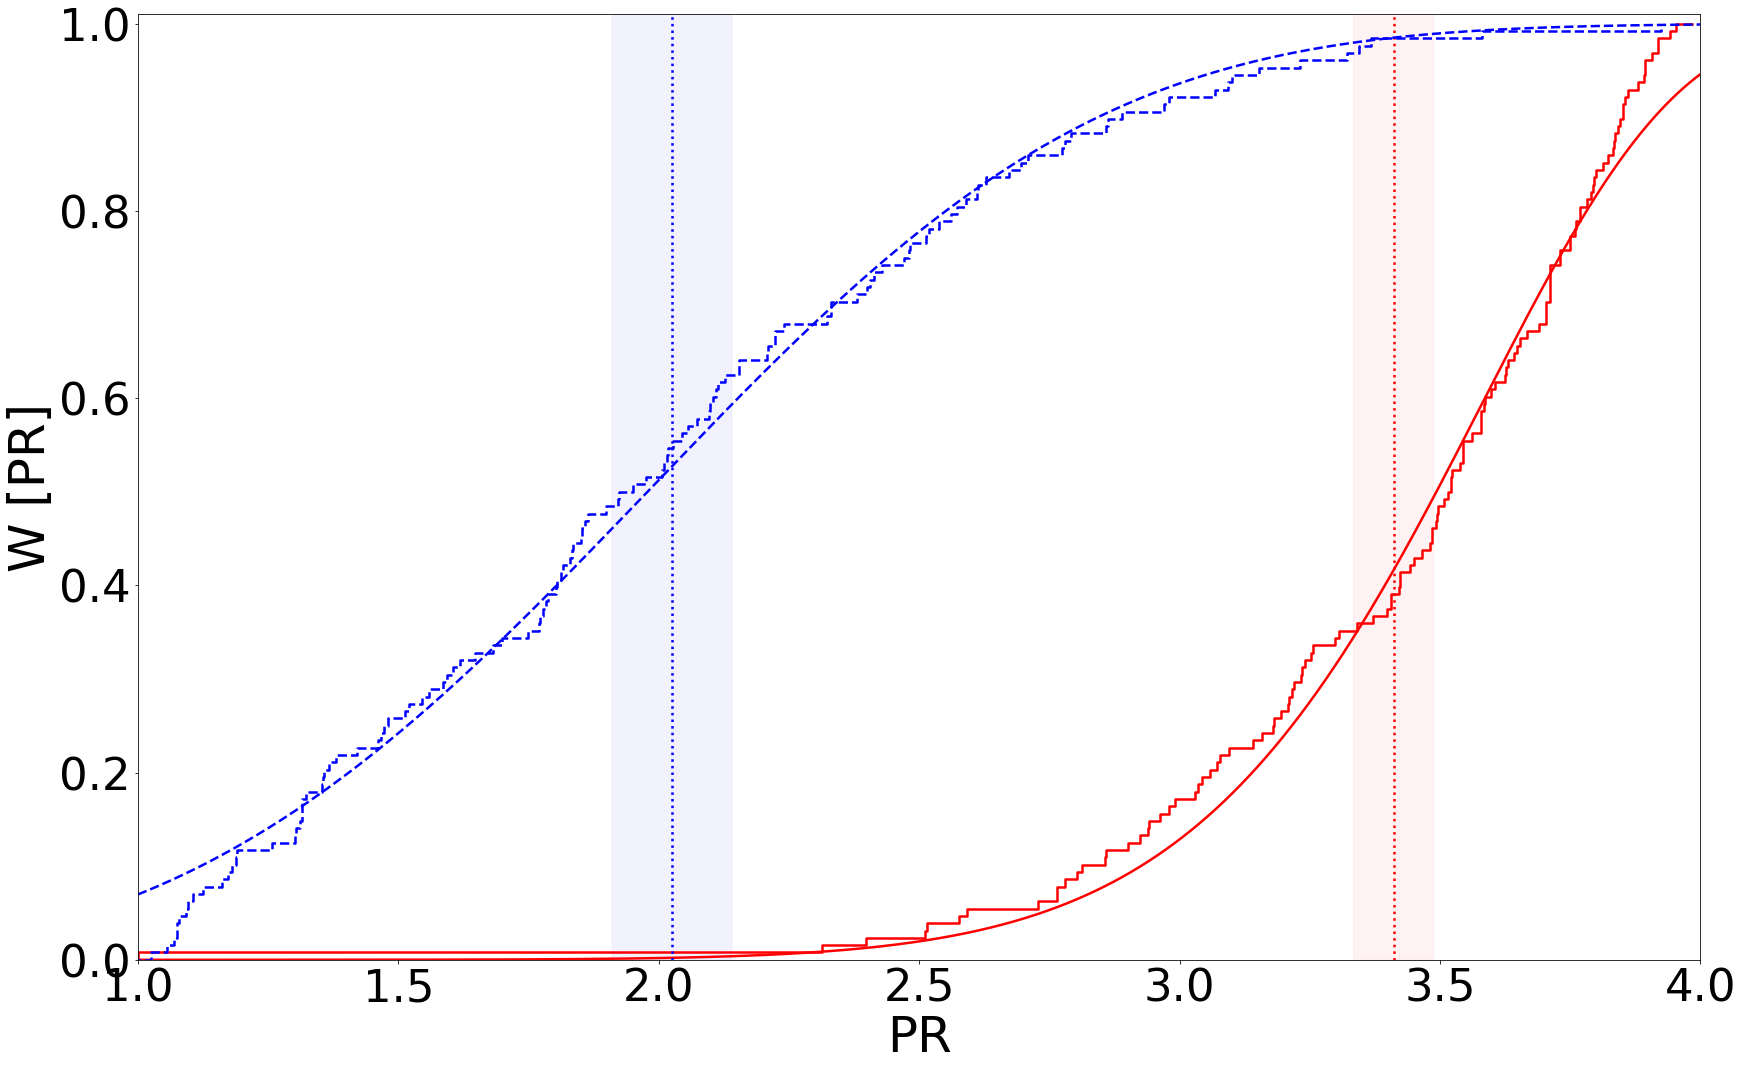

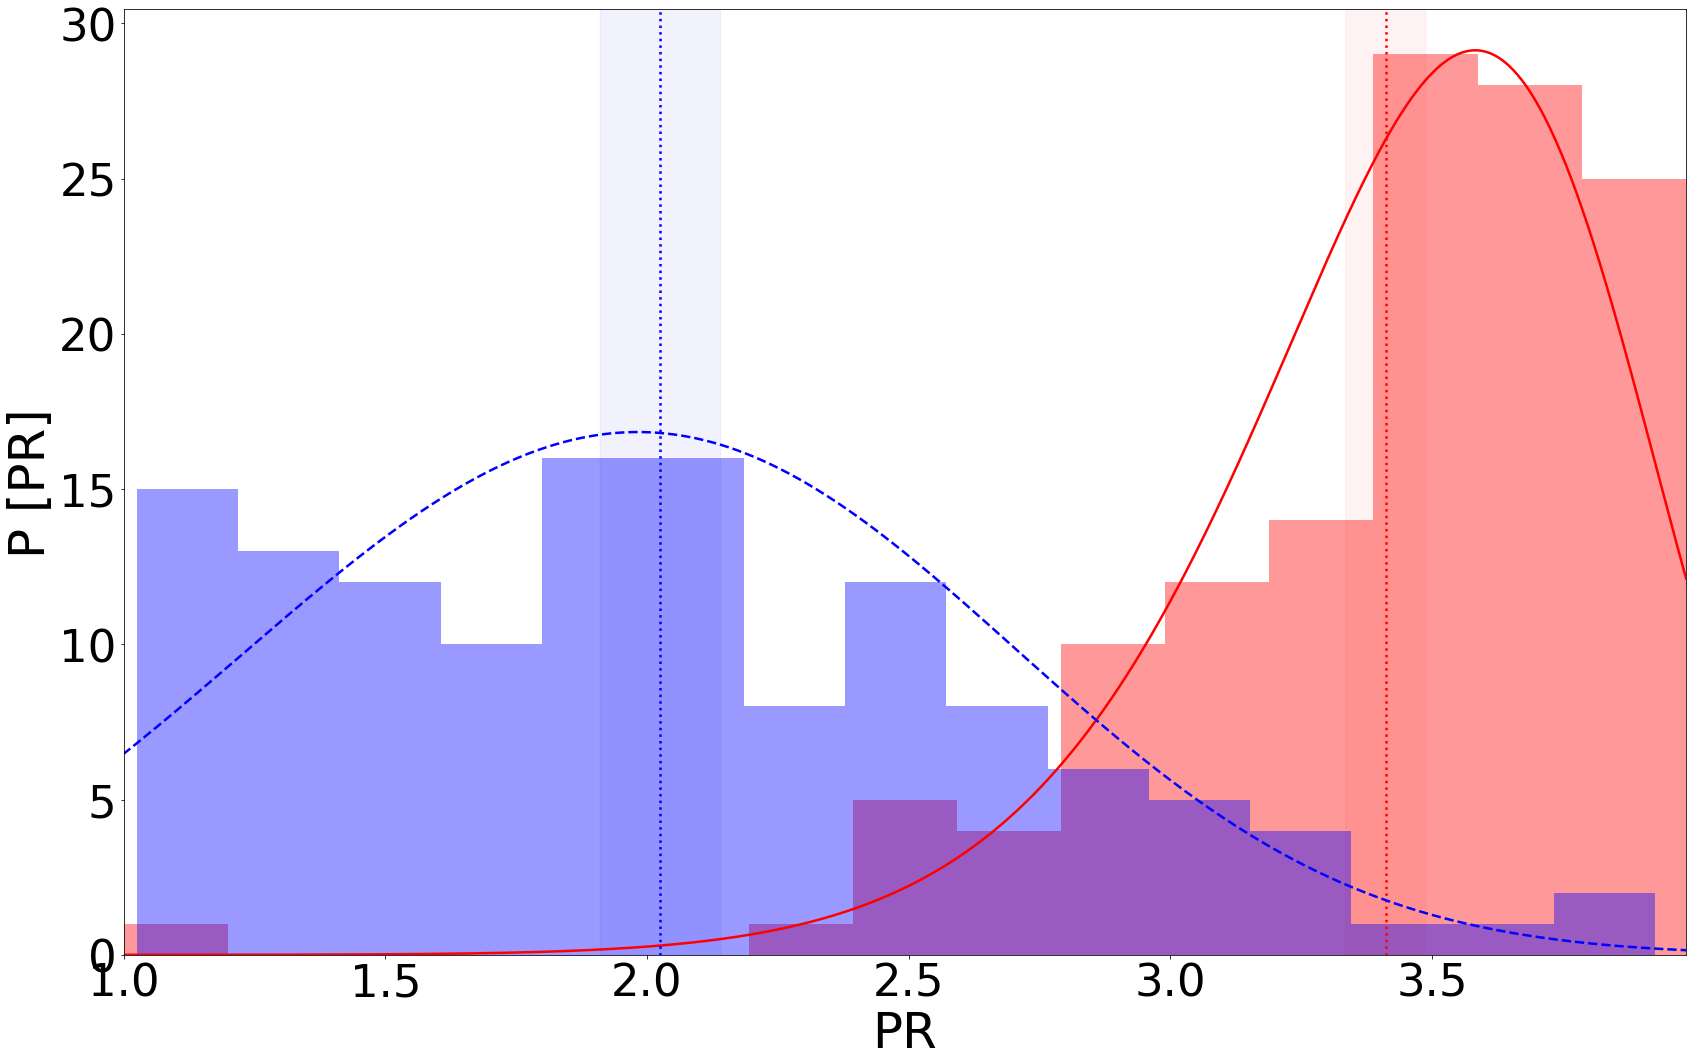

In [12]:
#===================================================
# PARTICIPATION RATIOS OF THE DATA IN THE
# LEARNING-STYLES'S ORIGINAL BASIS SET
# (ACTIVIST, REFLECTOR, THEORIST, AND PRAGMATIST)
# AND IN THE BASIS SET FORMED BY THE EIGENVECTORS
# OF THE COVARIANCE MATRIX
#===================================================
printt('===========================================')
printt('PARTICIPATION RATIOS (PRs)...')
printt('===========================================')
printt(' ')
#---------------------------------------------------
printt('-------------------------------------------')
printt(' Computation of the PRs...')
printt('-------------------------------------------')
printt(' ')
# Participation ratios in the original LS basis set
# (column 0) and in the basis set formed by the
# covariance eigenvectors (column 1)
pr   = np.zeros((L,2))
#
# Notice that the PRs for a state with coefficientes C_i
# are defined as
#
# PR = (\sum Ci^2)^2/\sum C_i^4
#
# Instead of as
#
# PR = \sum Ci^2 /\sum C_i^4
#
# In this way, in a basis set formed by N elements
#
#  1 <= PR <= N.
#
# Notice that PR may equal 0 when all coefficients
# nullify. Then, we impose a value equal to 1.
#
for i  in range(0,L):
# LSs basis set
# (activist, reflector, theorist, pragmatist)
  sum2 = 0.0
  sum4 = 0.0
  for j  in range(0,K):
    p2   = data[i, j] * data[i, j]
    sum2 = sum2 + p2
    sum4 = sum4 + p2 * p2
#
  if( p2 == 0):
#   We impose that the PR equals 1
    pr[i,0] = 1 # 0
  else:
    pr[i,0] = sum2 * sum2 / sum4
#
# Basis set formed by the eigenfunctions
  sum2 = 0.0
  sum4 = 0.0
  for j  in range(0,K):
    p2   = proj[i, j] * proj[i, j]
    sum2 = sum2 + p2
    sum4 = sum4 + p2 * p2
#
  if( p2 == 0):
#   We impose that the PR equals 1
    pr[i,1] = 1 # 0
  else:
    pr[i,1] = sum2 * sum2 / sum4
#
#printt('  pr : ', pr)
#printt(' ')
printt('-------------------------------------------')
printt(' Computation of the PRs done!')
printt('-------------------------------------------')
printt(' ')
#---------------------------------------------------
printt('-------------------------------------------')
printt(' Mean value and uncertainties of the PRs...')
printt('-------------------------------------------')
printt(' ')
prmean = [ np.mean(pr[:,0]), np.mean(pr[:,1])]
#
confidence_interval_pr0=st.t.interval(confidence=0.95, df=len(pr[:,0])-1, loc=np.mean(pr[:,0]), scale=st.sem(pr[:,0])) 
uncert_abs_pr0    =0.5*(confidence_interval_pr0[1]-confidence_interval_pr0[0])
#
confidence_interval_pr1=st.t.interval(confidence=0.95, df=len(pr[:,1])-1, loc=np.mean(pr[:,1]), scale=st.sem(pr[:,1])) 
uncert_abs_pr1    =0.5*(confidence_interval_pr1[1]-confidence_interval_pr1[0])
#
uncert_abs_pr = [ uncert_abs_pr0, uncert_abs_pr1 ]
printt('  prmean     : ' + str(prmean))
printt('  Uncert(PR) : ' + str(uncert_abs_pr))
printt(' ')
printt('-------------------------------------------')
printt(' Mean value and uncertainties of PRs done!')
printt('-------------------------------------------')
printt(' ')
#
#---------------------------------------------------
# Plot of the participation ratios...
printt('-------------------------------------------')
printt(' Analysis of the cumulative probability')
printt(' distribution (W(PR)) of the PRs')
printt(' (plot and fitting using a Weibull)')
printt(' distribution)...')
printt('-------------------------------------------')
#
fig, ax = plt.subplots(figsize = ( w_fig, h_fig )) #, layout='constrained')
#
ymaxx   = 10000000000
#
parameters_Weibull_PR = np.zeros((K,2))
xWeib   = np.arange(1, 4.1, 0.001)
#
for ipr in range(0, 2):
# printt('  ipr : ', ipr)
  if(ipr == 0):
    printt('  W(PR) in the LS original basis set')
  else:
    printt('  W(PR) in the eigenvectors basis set')
  printt(' ')
#
  x = pr[:, ipr]
  x = np.sort(x)
#
  y = np.zeros(L)
  y[0] = 0
  dy = 1 / float(L-1)
  for i in range(1,L):
    y[i] = y[i-1] + dy
#
# Staircase
  x2 = np.zeros(2*L+2)
  y2 = np.zeros(2*L+2)
  x2[0]  =   0
  y2[0]  =   0
  x2[2*L+1] = x[L-1]
  y2[2*L+1] = 1
#
# Find the points close to 1, 2, and 3
# in order to correcly color the
# PR that lie in the ranges [0, 1), 
# (1, 2), (2,3), and (3,4]
  ic   = [-1, -1]
  xc   = [ 1,  2]
  xref = [ 2,  3]
#
  for i in range(0,len(ic)):
    for j in range(0, L):
      if( x[j] > xc[i] and x[j] < xref[i] ):
        ic[i] = j
        xc[i] = x[j]
#
# Fitting using Weibull distribution
  param = curve_fit(Wweibull, x, y, [prmean[ipr], 1], maxfev = max_iter_Weib)
# printt('  ', param)
# printt(' ')
  [alpha_Weibull, k_Weibull] = param[0]
  pcov = param[1]
  parameters_Weibull_PR[ipr] = [alpha_Weibull, k_Weibull]
  printt('  alpha_Weibull : ' + str(alpha_Weibull))
  printt('  k_Weibull : ' + str(k_Weibull))
  printt(' ')
  printt(' ')
#
  for i in range(0,L):
    x2[2*i+1] = x[i]
    x2[2*i+2] = x[i]

    y2[2*i+1] = y[i]
    y2[2*i+2] = y[i] + dy
  y2[2*L] = 1    
#
# Plotting limits
  ymin_W = 0.00
  ymax_W = 1.01 
  ax.set_xlim( [ 1, 4] )
  ax.set_ylim( [ ymin_W, ymax_W] )
#
# Tick parameters
  ax.tick_params(axis='both', which='major', labelsize = ticksize_PR)
#
# Labels
  ax.set_xlabel('PR', fontsize = labelsize_PR)
  ax.set_ylabel('W [PR]',      fontsize = labelsize_PR)
#
# Plot cumulative distribution and Weibull fitting function
#
  ax.plot(x2, y2,                                 lw = PR_W_width, color = PR_color[ipr], ls = PR_line[ipr])
  ax.plot(xWeib,Wweibull(xWeib, alpha_Weibull, k_Weibull) , lw = PR_W_width, color = PR_color[ipr], ls = PR_line[ipr])  
#
# Plot the average value as a vertical line
  ax.plot([prmean[ipr], prmean[ipr]], [ymin, ymax], lw = PR_mean_width, color = PR_color[ipr], ls = PR_mean_line)
  plt.fill_between([prmean[ipr]-uncert_abs_pr[ipr], prmean[ipr]+uncert_abs_pr[ipr]], [ymin, ymaxx], color = PR_color[ipr], alpha = PR_mean_alpha )  
#
filename_PR_W = output_statistics_pr + '/Fig_PR_W.png'
printt('Saving ' + filename_PR_W)
plt.savefig(filename_PR_W)
printt(' ')
printt('-------------------------------------------')
printt(' W(PR) done!')
printt('-------------------------------------------')
printt(' ')
#---------------------------------------------------
printt('-------------------------------------------')
printt(' Probability distribution (P(PR)) of the PRs')
printt(' (plot and fitting using Weibull function...)')
printt('-------------------------------------------')
#
fig, ax = plt.subplots(figsize = ( w_fig, h_fig )) #, layout='constrained')
#
xWeib   = np.arange(0.8, 4.2, 0.001)
xmaxtot = 0
ymaxtot = 0
ymaxx   = 10000000000
#
for ipr in range(0, 2):
  if(ipr == 0):
    printt('  W(PR) in the LS original basis set')
  else:
    printt('  W(PR) in the eigenvectors basis set')
  printt(' ')
  x = pr[:, ipr]
#
# Tick parameters
  ax.tick_params(axis='both', which='major', labelsize = ticksize_PR)
#
# Labels
  ax.set_xlabel('PR', fontsize = labelsize_PR)
  ax.set_ylabel('P [PR]',      fontsize = labelsize_PR)
#
  y, x, _= ax.hist(x, bins=15, color = PR_color[ipr], alpha = PR_alpha) # We create a histogram with 15 blocks instead of just bins=10
  xmax = x.max()
  if xmax > xmaxtot:
    xmaxtot = xmax
#
  ymax = y.max()
  if ymax > ymaxtot:
    ymaxtot = ymax
#
# Probability distribution for Weibull function, scaled
# in such a way that its maximum coincides with that of the histogram
  [alpha_Weibull, k_Weibull] = parameters_Weibull_PR[ipr]
  factor = ymax / Pweibull(alpha_Weibull, alpha_Weibull, k_Weibull)
  ax.plot(xWeib,factor*Pweibull(xWeib, alpha_Weibull, k_Weibull) , lw = PR_W_width,   color = PR_color[ipr], ls = PR_line[ipr])  
#
# Plot the average value as a vertical line
  plt.fill_between([prmean[ipr]-uncert_abs_pr[ipr], prmean[ipr]+uncert_abs_pr[ipr]], [ymin, ymaxx], color = PR_color[ipr], alpha = PR_mean_alpha )
  ax.plot([prmean[ipr], prmean[ipr]], [ymin, ymaxx], lw = PR_mean_width, color = PR_color[ipr], ls = PR_mean_line)
#
# Plotting limits 
ymax = ymaxtot * 1.05
ax.set_xlim( [ 0.99, 4.01] )
ax.set_xlim( [ 1, xmaxtot] )
ax.set_ylim( [ 0, ymax] )

filename_PR_P = output_statistics_pr + '/Fig_PR_P.png'
printt('Saving ' + filename_PR_P)
plt.savefig(filename_PR_P)
printt(' ')
printt('-------------------------------------------')
printt(' P(PR) done!')
printt('-------------------------------------------')
printt(' ')
printt(' ')
printt('===========================================')
printt('PARTICIPATION RATIOS DONE!')
printt('===========================================')

=========================================== 3D PLOT OF THE LSs... ===========================================   -------------------------------------------  Llt : 4 -------------------------------------------   -------------------------------------------    ilt : 1 Labels LS   :     Activist vs Reflector vs Pragmatist        Activist vs Reflector vs Pragmatist       Mean :10.78294573643410815.47286821705426412.720930232558139         index0 : 0       index1 : 1       index2 : 3      (index3 : 2) Saving /home/frp/ownCloud/articulos_fabio/2_tex/AAA_submitted/educacion/learning_styles_JSciEduTech/4_chaea3s/chaea3s_paachaea/chaea3s/output/figs//participants/Fig_Activist_Reflector_Pragmatist.png  Plots for the LSs done! -------------------------------------------   =========================================== 3D PLOT OF THE LSs DONE! =========================================== 

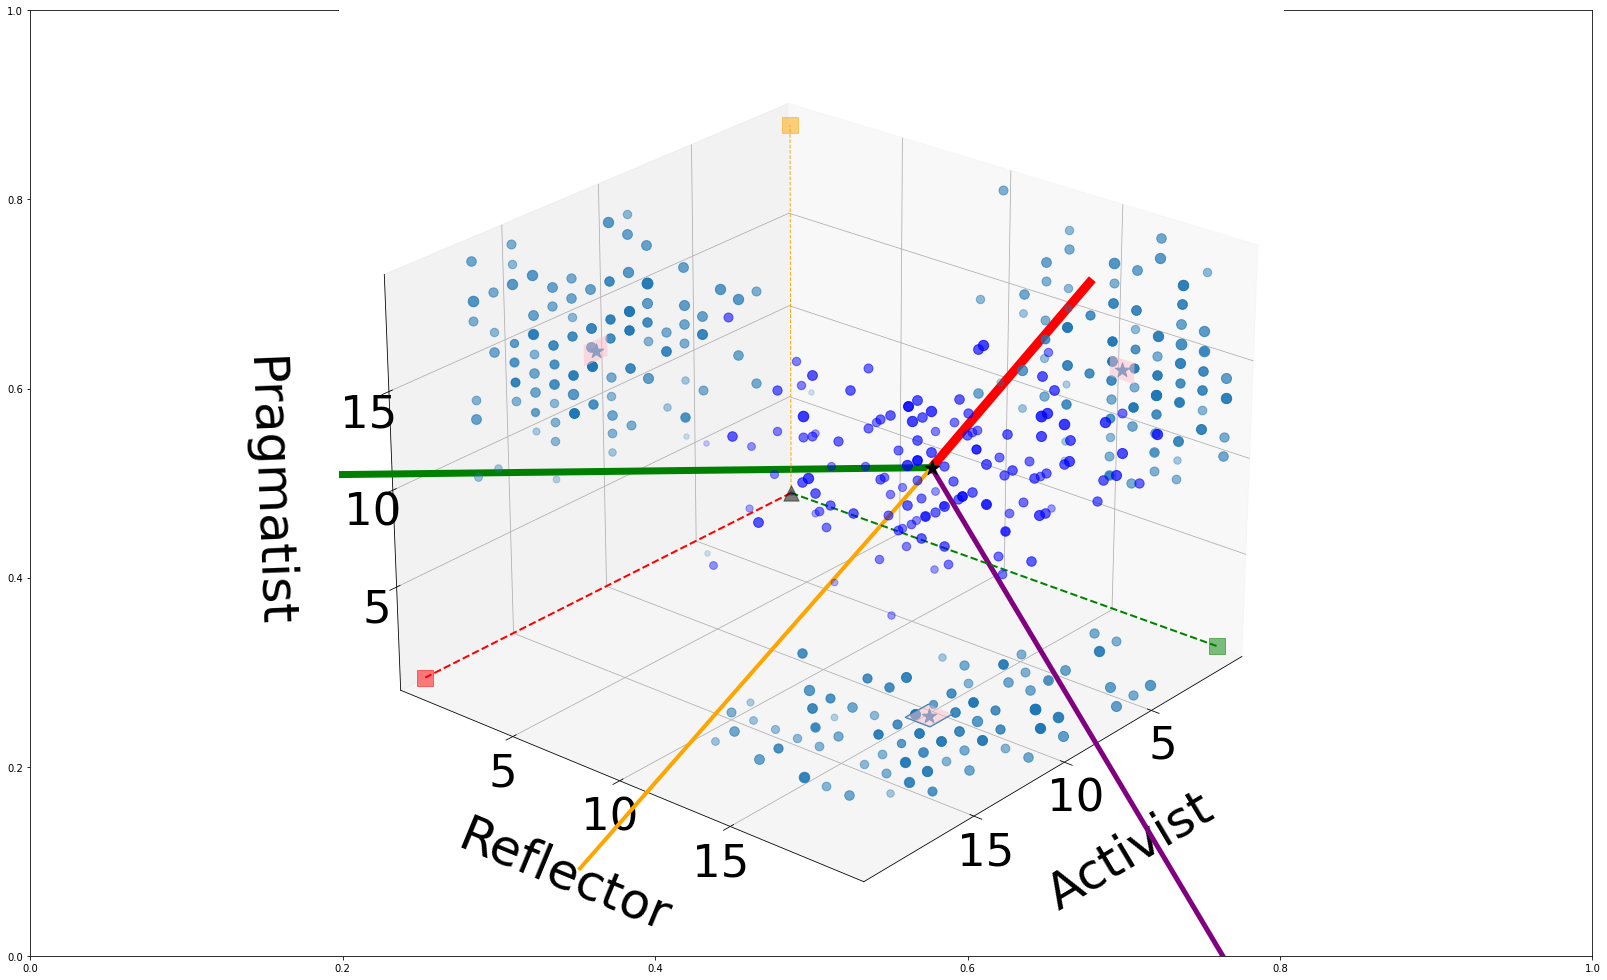

In [13]:

#===================================================
# 3D PLOT OF THE LS
# (THE FOURTH LS IS INCLUDED IN THE CHARACTERISTICS
# OF THE SYMBOLS)
#===================================================
printt('===========================================')
printt('3D PLOT OF THE LSs...')
printt('===========================================')
printt(' ')
#----------------------------------------------------------
Llt = len(learning_trios)
printt('-------------------------------------------')
printt(' Llt : ' + str(Llt))
printt('-------------------------------------------')
printt(' ')

for ilt in range(itrios,itrios+1):

  fig = plt.subplots(figsize = ( w_fig, h_fig )) #, layout='constrained')
  ax  = plt.axes(projection ="3d")

  ax.set_xlim([ xmin3D, xmax3D] )
  ax.set_ylim([ ymin3D, ymax3D] )
  ax.set_zlim([ zmin3D, zmax3D] )
# ax.set_xlim([ xmin, xmax] )
# ax.set_ylim([ ymin, ymax] )
# ax.set_zlim([ zmin, zmax] )

  ax.set_xticks([5, 10, 15])
  ax.set_yticks([5, 10, 15])
  ax.set_zticks([5, 10, 15])
  ax.tick_params(axis='both', which='major', labelsize = ticksize_3D)

#----------------------------------------------------------
# Scatter as a function of PCi, PCj and PCk
# with i, j, k = 0, 1, 2, or 3.
  printt('-------------------------------------------')
  printt('   ilt : ' + str(ilt))

  index0 = learning_trios[ilt][0]
  index1 = learning_trios[ilt][1]
  index2 = learning_trios[ilt][2]
  
  for i in range(0,K):
    if( i != index0 and i!= index1  and i!= index2 ):
      index3 = i

# Label_LS
  Label_LS0 = Label_LS[index0]
  Label_LS1 = Label_LS[index1]
  Label_LS2 = Label_LS[index2]

  printt('Labels LS   :     ' + str(Label_LS0) + ' vs ' + str(Label_LS1) + ' vs ' + str(Label_LS2))
# printt('Labels LS_PC:     ', Label_LS_PC0, ' vs ', Label_LS_PC1)  
  printt(' ')        
  printt('     ' + str(Label_LS0) + ' vs ' + str(Label_LS1) + ' vs ' + str(Label_LS2))
  printt('      Mean :' + str(xmean[index0]) + str(xmean[index1]) + str(xmean[index2]))
  printt(' ')
  printt('      index0 : ' + str(index0))
  printt('      index1 : ' + str(index1))     
  printt('      index2 : ' + str(index2))
  printt('     (index3 : ' + str(index3) + ')')
  
  ax.set_xlabel(Label_LS0, fontsize = labelsize_3D, labelpad = labelpad_3D)
  ax.set_ylabel(Label_LS1, fontsize = labelsize_3D, labelpad = labelpad_3D)
  ax.set_zlabel(Label_LS2, fontsize = labelsize_3D, labelpad = labelpad_3D)
                   
  vx0 = data[:,index0]
  vx1 = data[:,index1]
  vx2 = data[:,index2]
  vx3 = data[:,index3]

# Eigenvectors
  for j in range(0,K):
    vj = eigenVectors_max1[:,j]*distmeanmax

    v0 = xmean[index0]+vj[index0]
    v1 = xmean[index1]+vj[index1]
    v2 = xmean[index2]+vj[index2]              
    v3 = xmean[index3]+vj[index3]

    ax.plot([xmean[index0], v0], [xmean[index1], v1], [xmean[index2], v2], lw=width_PC_vectors_3D[j], color=PC_color[j], ls=PC_line_bis[j])

# Shaded are in the PC1-PC2 plane
  vj0 = eigenVectors[:,0]*distmeanmax
  v00 = xmean[index0]+vj0[index0]
  v01 = xmean[index1]+vj0[index1]
  v02 = xmean[index2]+vj0[index2]        
  v03 = xmean[index3]+vj0[index3]
    
  vj1 = eigenVectors[:,1]*distmeanmax
  v10 = xmean[index0]+vj1[index0]
  v11 = xmean[index1]+vj1[index1]
  v12 = xmean[index2]+vj1[index2]        
  v13 = xmean[index3]+vj1[index3]
  
  xx = [xmean[index0], v00, v10]
  yy = [xmean[index1], v01, v11]
  zz = [xmean[index2], v02, v12]

# Points
  for i in range(0,L):
    x0 = vx0[i]
    x1 = vx1[i]
    x2 = vx2[i]
    x3 = vx3[i]

    tendency3 = scatter_tendency(Label_LS[index3], x3)
    [tendency3, scatter_color3, scatter_size3, scatter_alpha3, scatter_symbol3]=scatter_properties(tendency3, x3)

    ax.scatter3D(x0, x1, x2, s=scatter_size3, marker=scatter_symbol3, color=scatter_color3,      alpha=scatter_alpha3)
#   ax.scatter3D(x0, x1, x2, s=scatter_size3, marker=scatter_symbol3, edgecolors=scatter_color3, facecolors='none')

#   Projections on the Cartesian planes
    colorsx     = colors_proj
    edgecolorsx = edgecolors_proj
      
    colorsy     = colors_proj
    edgecolorsy = edgecolors_proj

    colorsz     = colors_proj
    edgecolorsz = edgecolors_proj
    
    ax.scatter(x1, x2, s=scatter_size3, marker=scatter_symbol3, color=colorsx,  alpha=scatter_alpha3, zdir='x')
#    ax.scatter(x1, x2, s=scatter_size3, marker=scatter_symbol3, edgecolors=edgecolorsx, facecolors='none', zdir='x')

    ax.scatter(x0, x2, s=scatter_size3, marker=scatter_symbol3, color=colorsy,  alpha=scatter_alpha3, zdir='y')
#    ax.scatter(x0, x2, s=scatter_size3, marker=scatter_symbol3, edgecolors=edgecolorsy, facecolors='none', zdir='y')

    ax.scatter(x0, x1, s=scatter_size3, marker=scatter_symbol3, color=colorsz,  alpha=scatter_alpha3, zdir='z')
#    ax.scatter(x0, x1, s=scatter_size3, marker=scatter_symbol3, edgecolors=edgecolorsz, facecolors='none', zdir='z')

# Average mean
  ax.scatter3D(xmean[index0], xmean[index1], xmean[index2], s=size_mean, marker=mean_symbol, color='k')

# Projections of the average mean on the Cartesian planes
  ax.scatter(xmean[index1], xmean[index2], s=size_mean, marker=mean_symbol, color=colorsx, zdir='x')
# ax.scatter(xmean[index1], xmean[index2], s=size_mean, marker=mean_symbol, edgecolors=edgecolorsx, facecolors='none', zdir='x')
  
  ax.scatter(xmean[index0], xmean[index2], s=size_mean, marker=mean_symbol, color=colorsy, zdir='y')
# ax.scatter(xmean[index0], xmean[index2], s=size_mean, marker=mean_symbol, edgecolors=edgecolorsy, facecolors='none', zdir='y')
    
  ax.scatter(xmean[index0], xmean[index1], s=size_mean, marker=mean_symbol, color=colorsz, zdir='z')
# ax.scatter(xmean[index0], xmean[index1], s=size_mean, marker=mean_symbol, edgecolors=edgecolorsz, facecolors='none', zdir='z')

# Fill uncertainty areas for the average mean on the projections
  xx = [xmin3D, xmin3D, xmin3D, xmin3D]
  yy = [xmean[index1]-dxmean[index1],
        xmean[index1]+dxmean[index1],
        xmean[index1]+dxmean[index1],
        xmean[index1]-dxmean[index1]]
  zz = [xmean[index2]-dxmean[index2],
        xmean[index2]-dxmean[index2],
        xmean[index2]+dxmean[index2],
        xmean[index2]+dxmean[index2]]
  verts = [(xx[i],yy[i],zz[i]) for i in range(len(xx))]
  ax.add_collection3d(Poly3DCollection([verts],facecolor = mean_uncert_color, alpha = mean_alpha))

  xx = [xmean[index0]-dxmean[index0],
        xmean[index0]+dxmean[index0],
        xmean[index0]+dxmean[index0],
        xmean[index0]-dxmean[index0]]
  zz = [xmean[index2]-dxmean[index2],
        xmean[index2]-dxmean[index2],
        xmean[index2]+dxmean[index2],
        xmean[index2]+dxmean[index2]]
  yy = [ymin3D, ymin3D, ymin3D, ymin3D]
  verts = [(xx[i],yy[i],zz[i]) for i in range(len(xx))]
  ax.add_collection3d(Poly3DCollection([verts],facecolor = mean_uncert_color, alpha = mean_alpha))
  
  xx = [xmean[index0]-dxmean[index0],
        xmean[index0]+dxmean[index0],
        xmean[index0]+dxmean[index0],
        xmean[index0]-dxmean[index0]]
  yy = [xmean[index1]-dxmean[index1],
        xmean[index1]-dxmean[index1],
        xmean[index1]+dxmean[index1],
        xmean[index1]+dxmean[index1]]
  zz = [zmin3D, zmin3D, zmin3D, zmin3D]
  verts = [(xx[i],yy[i],zz[i]) for i in range(len(xx))]
  ax.add_collection3d(Poly3DCollection([verts],facecolor = mean_uncert_color, alpha = mean_alpha))

# Origin
  orig0 = LS[4, index0] + xmean[index0]
  orig1 = LS[4, index1] + xmean[index1]
  orig2 = LS[4, index2] + xmean[index2]
  ax.scatter3D(orig0, orig1, orig2, s = size_mean, marker = origin_symbol, color = origin_color, alpha = origin_alpha)  

# Pure maximal learning styles
# (only those whith the LS that appear in the axes)
  for i in [index0, index1, index2]:  
    x0 = LS[i, index0] + xmean[index0]
    x1 = LS[i, index1] + xmean[index1]
    x2 = LS[i, index2] + xmean[index2]
    ax.scatter3D(x0, x1, x2,  s = size_mean, marker = twenty_symbol[i], color = PC_color[i], alpha = twenty_alpha)  
    ax.plot([orig0, x0], [orig1, x1], [orig2, x2], color = twenty_color[i], ls = twenty_line[i], lw = twenty_width_3D[i])

  ax.plot(xx,yy,zz,label="line plot")

  ax.view_init(25,40)

  filename_ls_3d = output_participants + '/Fig_'+Label_LS0+'_'+Label_LS1+'_'+Label_LS2+'.png'
  printt('Saving ' + filename_ls_3d)
  plt.savefig(filename_ls_3d) #, bbox_inches='tight', transparent=True, pad_inches=0)

  printt(' Plots for the LSs done!')
  printt('-------------------------------------------')
  printt(' ')
printt('===========================================')
printt('3D PLOT OF THE LSs DONE!')
printt('===========================================')

===========================================  PROJECTIONS ON PCs AND STATISTICS... ===========================================   -------------------------------------------  W(s) for the projections on the PCs... -------------------------------------------    PC -20 to 20 : 0    alpha_Weibull     : 27.401944666696636    k_Weibull         : 9.54443625177869    theta_Weibull     : -25.920816853535918      PC -20 to 20 : 1    alpha_Weibull     : 8.86661448788321    k_Weibull         : 2.249235494184352    theta_Weibull     : -7.721103547883937      PC -20 to 20 : 2    alpha_Weibull     : 6.741261171853772    k_Weibull         : 3.0258961621514446    theta_Weibull     : -5.959419587368208      PC -20 to 20 : 3    alpha_Weibull     : 7.514418297372746    k_Weibull         : 4.946445062259475    theta_Weibull     : -6.9928435311556925   -------------------------------------------  Plotting scatter 2D on the principal axes  and probabilities on the PCs...  PC : 0    ( PC0 vs PC1 )      xmin : 

/tmp/ipykernel_18064/928990034.py:533: RuntimeWarning: invalid value encountered in power
  return (k_Weibull/alpha_Weibull) * ((x-theta_Weibull)/alpha_Weibull)**(k_Weibull-1) * np.exp(-((x-theta_Weibull)/alpha_Weibull)**k_Weibull)


   Saving /home/frp/ownCloud/articulos_fabio/2_tex/AAA_submitted/educacion/learning_styles_JSciEduTech/4_chaea3s/chaea3s_paachaea/chaea3s/output/figs//Fig_PC0_PC1_P.png    Plots for the PCs done! -------------------------------------------   ===========================================  PROJECTIONS ON PCs AND STATISTICS DONE! =========================================== 

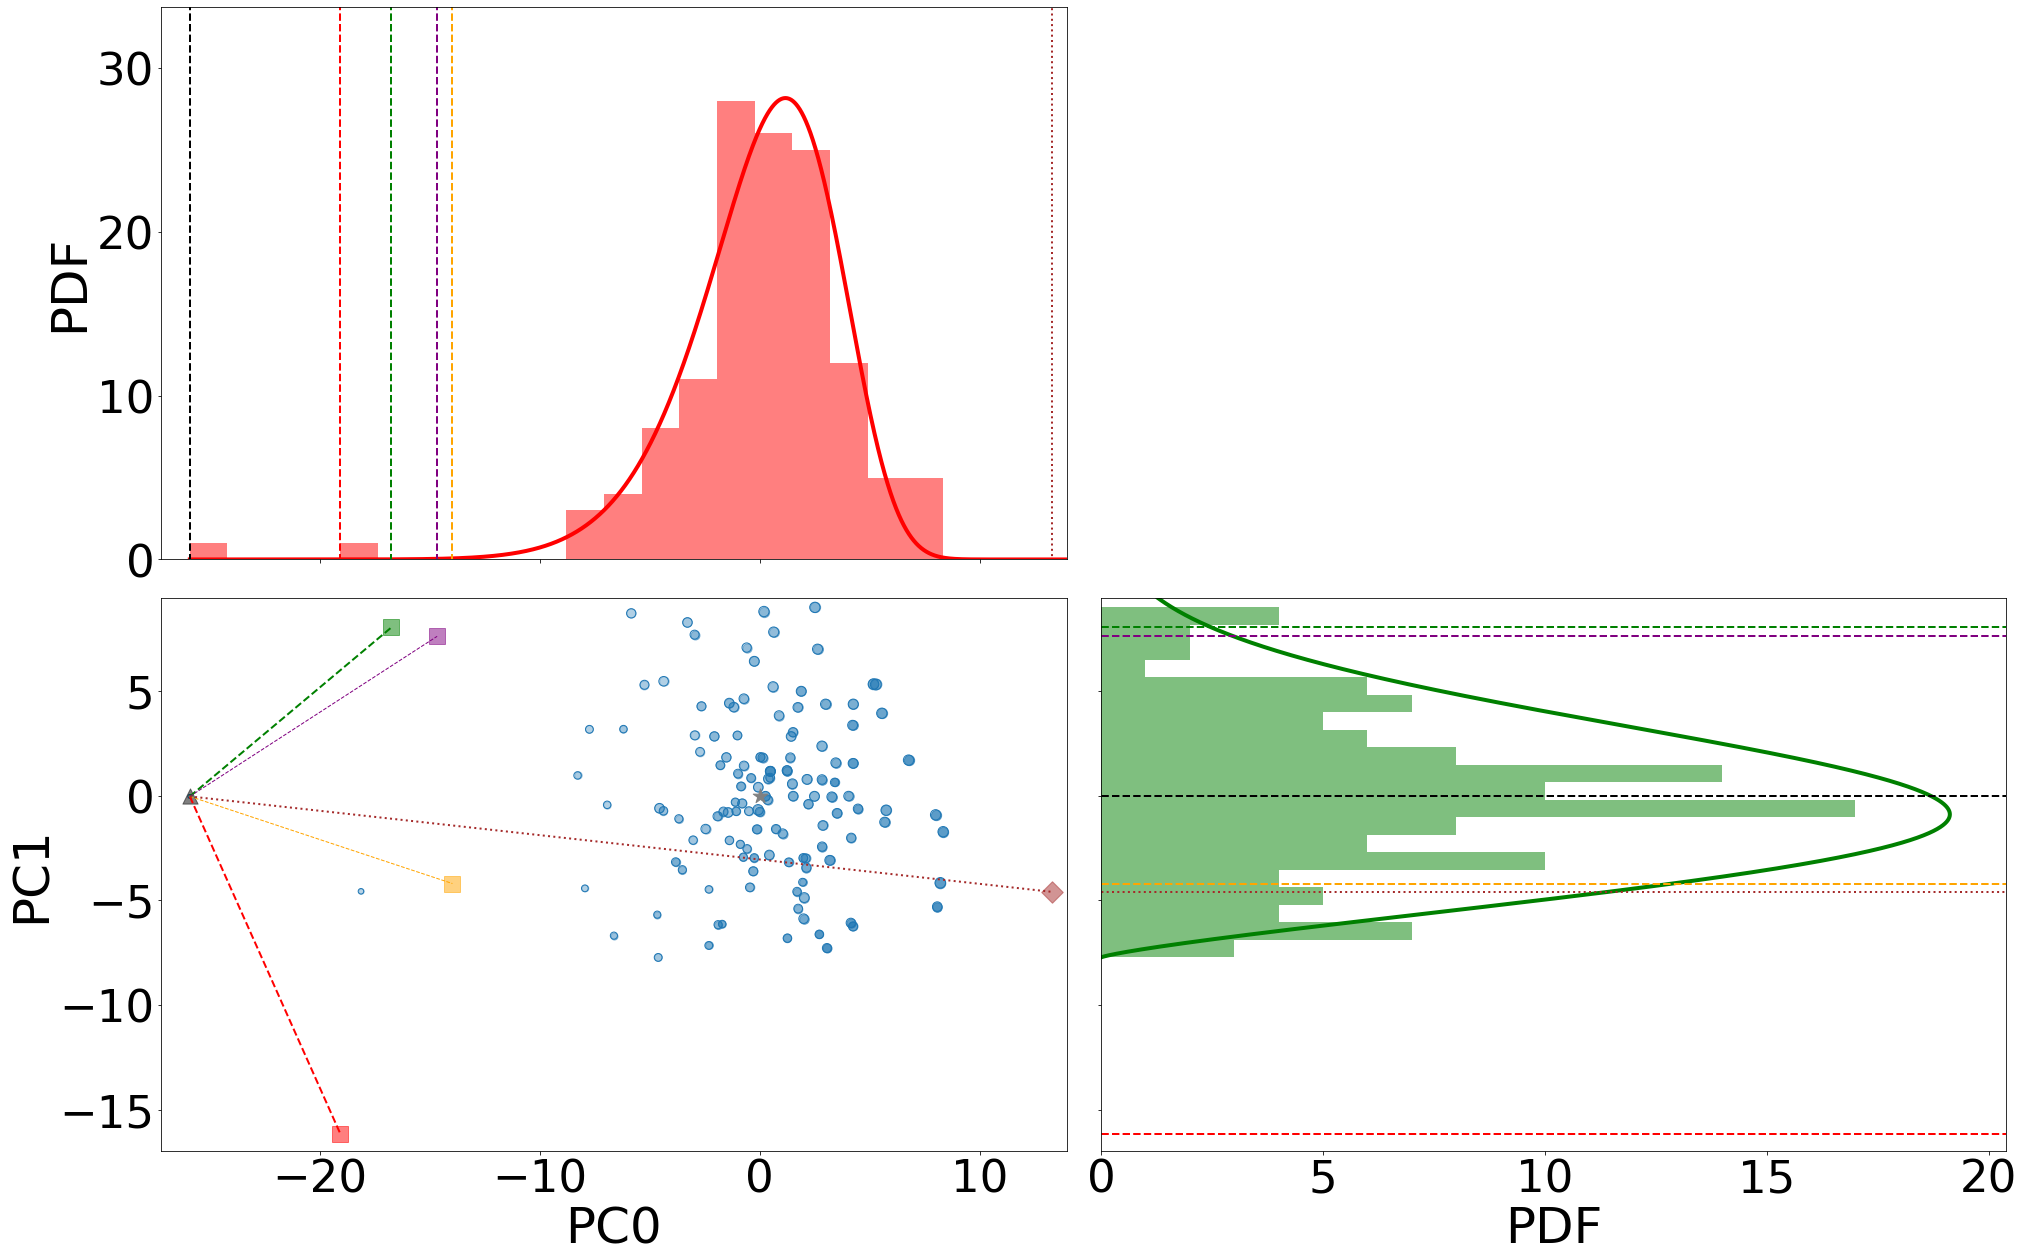

In [14]:

printt('===========================================')
printt(' PROJECTIONS ON PCs AND STATISTICS...')
printt('===========================================')
printt(' ')
#---------------------------------------------------
printt('-------------------------------------------')
printt(' W(s) for the projections on the PCs...')
printt('-------------------------------------------')
parameters_Weibull_PC20 = np.zeros((K,3))
  
xmin = proj.min()
xmax = proj.max()
  
xmin_proj_tot = xmin
xmax_proj_tot = xmax

xWeib_proj = np.arange(xmin*2.5, xmax*2.5, (xmax-xmin)/100000)

for ipc in range(0, K):
  printt('   PC -20 to 20 : ' + str(ipc))
  x = proj[:, ipc]
  x = np.sort(x)

  xmin_proj = x.min()
 
  y = np.zeros(L)
  y[0] = 0
  dy = 1 / float(L-1)
  for i in range(1,L):
    y[i] = y[i-1] + dy

# Fitting using Weibull distribution
  param = curve_fit(Wweibull, x-xmin_proj, y, [projmean[ipc]-xmin_proj, 1], maxfev = max_iter_Weib)

  [alpha_Weibull, k_Weibull] = param[0]
  theta_Weibull = xmin_proj
  parameters_Weibull_PC20[ipc] = [alpha_Weibull, k_Weibull, theta_Weibull]
  printt('   alpha_Weibull     : ' + str(alpha_Weibull))
  printt('   k_Weibull         : ' + str(k_Weibull))
  printt('   theta_Weibull     : ' + str(theta_Weibull))
  printt(' ')
  
for ilp in range(0, 1):

  fig, ((ax_hor, ax_no), (ax, ax_ver)) = plt.subplots(2, 2, figsize = ( w_fig, h_fig ), layout='constrained')
# fig, ((ax_hor, ax_no), (ax, ax_ver)) = plt.subplots(2, 2, figsize = ( w_fig, h_fig ), width_ratios=[w_fig, h_fig], layout='constrained')

# Limits
  ax_no.axis('off')
  ax.set_xlim([ xmin, xmax] )
  ax.set_ylim([ ymin, ymax] )

# Ticks
  ax.tick_params(axis='both', which='major', labelsize = ticksize)
# ax.tick_params(axis='x', which='major', labelsize = ticksize) #, sharey = ax_ver)
# ax.tick_params(axis='y', which='major', labelsize = ticksize) #, sharey = ax_hor)
#
#  ax_hor.tick_params(axis='both', which='major', labelsize = ticksize, sharey = ax)
#  ax.tick_params(axis='both', which='major', labelsize = ticksize, sharex = ax_hor, sharey = ax_ver)
#  ax_hor.tick_params(axis='x', which='major', labelsize = ticksize, sharey = ax_ver)
#  ax_ver.tick_params(axis='y', which='major', labelsize = ticksize, sharey = ax_hor)
#----------------------------------------------------------
# Scatter as a function of PC0, PC1, PC2, and PC3
  printt('-------------------------------------------')
  printt(' Plotting scatter 2D on the principal axes')
  printt(' and probabilities on the PCs...')

  printt(' PC : ' + str(ilp))
  printt(' ')
  index0 = learning_pairs[ilp][0]
  index1 = learning_pairs[ilp][1]
  index2 = -1
 
  for i in range(0,K):
    if( i != index0 and i!= index1 ):
      if ( index2 == -1):
        index2 = i
      else:
        index3 = i
#
# MAIN PANEL 
# Label PCs
  Label_PC0 = Label_PC[index0]
  Label_PC1 = Label_PC[index1]
  
  Label_PCPC0 = Label_PCPC[index0]
  Label_PCPC1 = Label_PCPC[index1]

  printt(' ( ' + str(Label_PCPC0) + ' vs ' + str(Label_PCPC1) + ' )')
  printt(' ')

  ax.set_xlabel(Label_PCPC0, fontsize=labelsize)
  ax.set_ylabel(Label_PCPC1, fontsize=labelsize)
    
# LS values
  vx0 = data[:,index0]
  vx1 = data[:,index1]
  vx2 = data[:,index2]
  vx3 = data[:,index3]

# Plot the projection of the coefficients PC0 and PC1
  vy0 = proj[:,index0]
  vy1 = proj[:,index1]
  vy2 = proj[:,index2]
  vy3 = proj[:,index3]

# Plot limits
  xmin = np.min( [np.min(vy0), np.min(projectLS[:,index0])])
  xmax = np.max( [np.max(vy0), np.max(projectLS[:,index0])])
  
  ymin = np.min( [np.min(vy1), np.min(projectLS[:,index1])])
  ymax = np.max( [np.max(vy1), np.max(projectLS[:,index1])])
  
  if ( xmin < 0 ):
   xmin = xmin * 1.05
  else:
   xmin = xmin * 0.95
   
  if ( xmax < 0 ):
   xmax = xmax * 0.95
  else:
   xmax = xmax * 1.05
   
  if ( ymin < 0 ):
   ymin = ymin * 1.05
  else:
   ymin = ymin * 0.95
   
  if ( ymax < 0 ):
   ymax = ymax * 0.95
  else:
   ymax = ymax * 1.05
   
  printt('   xmin : ' + str(xmin))
  printt('   xmax : ' + str(xmax))
  printt('   ymin : ' + str(ymin))
  printt('   ymax : ' + str(ymax))
  printt(' ')
  
# Points
  for i in range(0,L):
#  printt(i)
    x0 = vx0[i]
    x1 = vx1[i]
    x2 = vx2[i]
    x3 = vx3[i]
    
    y0 = vy0[i]
    y1 = vy1[i]
    y2 = vy2[i]
    y3 = vy3[i]

    tendency2 = scatter_tendency(Label_LS[index2], x2)
    tendency3 = scatter_tendency(Label_LS[index3], x3)
    [tendency2, scatter_color2, scatter_size2, scatter_alpha2, scatter_symbol2]=scatter_properties(tendency2, x2)
    [tendency3, scatter_color3, scatter_size3, scatter_alpha3, scatter_symbol3]=scatter_properties(tendency3, x3)

#   Color depends on whether we are making a plot with PC' vs PC1 or not
#   (see projections in the 3D plots as a funciton of the original LSs)
    if (ilp == 0):
      ax.scatter(y0, y1, s=scatter_size2, marker=scatter_symbol2,      color = colors_proj_PC, alpha=scatter_alpha3)
      ax.scatter(y0, y1, s=scatter_size2, marker=scatter_symbol2, edgecolors = colors_proj_PC, facecolors='none')
    else:
      ax.scatter(y0, y1, s=scatter_size2, marker=scatter_symbol2,      color = colors_proj, alpha=scatter_alpha3)
      ax.scatter(y0, y1, s=scatter_size2, marker=scatter_symbol2, edgecolors = colors_proj, facecolors='none')
      
# Origin
  orig0 = projectLS[4, index0]
  orig1 = projectLS[4, index1]
  ax.scatter(orig0, orig1, s = size_mean, marker = origin_symbol, color = origin_color, alpha = origin_alpha)  

# Pure maximal learning styles
  for i in range(0,K):  
    y0 = projectLS[i, index0]
    y1 = projectLS[i, index1]
    ax.scatter(y0, y1,   s = size_mean, marker = twenty_symbol[i], color = PC_color[i], alpha = twenty_alpha)  
    ax.plot([orig0, y0], [orig1, y1], color = twenty_color[i], ls = twenty_line[i], lw = twenty_width_2D[i])

  i = K + 1
  y0 = projectLS[i, index0]
  y1 = projectLS[i, index1]
  ax.scatter(y0, y1,   s = size_mean, marker = twenty_symbol[i], color = twenty_color[i], alpha = twenty_alpha)  
  ax.plot([orig0, y0], [orig1, y1], color    = twenty_color[i], ls = twenty_line[i], lw = twenty_width_2D[i])
  
# Average mean
  ax.scatter(0, 0, s = size_mean, marker=mean_symbol, color = mean_color2)
  
  ax.set_xlim([ xmin, xmax] )
  ax.set_ylim([ ymin, ymax] )
#
#**********************************************************************
# SECONDARY PANELS (PROBABILITY DENSITY FUNCTIONS)
#
  xWeib   = np.arange(xmin, xmax, (xmax-xmin)/10000)
  yWeib   = np.arange(ymin, ymax, (ymax-ymin)/10000)
#
#-------------------------------------------------------
# Projection on the PC associated with the horizontal axis
  ax_hor.set_ylabel('PDF', fontsize=labelsize)
  ax_hor.set_xlim([ xmin, xmax] )
  
  ipc = index0
  x = proj[:, ipc]
  x = np.sort(x)
     
  [alpha_Weibull, k_Weibull, theta_Weibull] = parameters_Weibull_PC20[ipc]
  printt('   alpha_Weibull : ' + str(alpha_Weibull))
  printt('   k_Weibull     : ' + str(k_Weibull))
  printt('   theta_Weibull : ' + str(theta_Weibull))
  printt(' ')
  
  ax_hor.tick_params(axis='both', which='major', labelsize=ticksize, labelbottom = False)
 
  y, x, _= ax_hor.hist(x, bins=20, color = PC_color[ipc], alpha=0.5)
  ymaxx = y.max()

# Probability distribution for Weibull function, scaled
  factor = ymaxx / Pweibull(alpha_Weibull, alpha_Weibull,  k_Weibull)
  ax_hor.plot(xWeib_proj,factor*Pweibull_translated(xWeib_proj, alpha_Weibull, k_Weibull, theta_Weibull), lw = PC_W_width,   color = PC_color[ipc], ls = PC_line[0]) #, ls = PC_line[ipc])
  
  ymaxx = ymaxx * 1.205
  ax_hor.set_ylim( [ 0, ymaxx] )   
 
# Plot as a vertical line the origin
  ax_hor.plot([projectLS[4,ipc], projectLS[4,ipc]], [ymin, ymaxx], color = twenty_color[4], ls = twenty_line[4], lw = twenty_width_W[6])
  
# Mark with lines the origin and the maximal (pure) learning styles  
  for i in range(0,K):  
    ax_hor.plot([projectLS[i, ipc], projectLS[i, ipc]], [ymin, ymaxx], color = twenty_color[i], ls = twenty_line[i], lw = twenty_width_W[6])

# Mark as lines the maximal point (20, 20, 20, 20)
  ax_hor.plot([projectLS[5,ipc], projectLS[5,ipc]], [ymin, ymaxx], color=twenty_color[5], ls = twenty_line[5], lw = twenty_width_W[6])
#
#-------------------------------------------------------
# Projection on the PC associated with the vertical axis
  ax_ver.set_xlabel('PDF', fontsize=labelsize)
  ax_ver.set_ylim([ ymin, ymax] )
  
  ipc = index1
  x = proj[:, ipc]
  x = np.sort(x)
     
  [alpha_Weibull, k_Weibull, theta_Weibull] = parameters_Weibull_PC20[ipc]
  printt('   alpha_Weibull : ' + str(alpha_Weibull))
  printt('   k_Weibull     : ' + str(k_Weibull))
  printt('   theta_Weibull : ' + str(theta_Weibull))
  printt(' ')
  
  ax_ver.tick_params(axis='both', which='major', labelsize=ticksize, labelleft = False)
 
  y, x, _= ax_ver.hist(x, bins=20, color = PC_color[ipc], alpha=0.5, orientation='horizontal')
  ymaxx = y.max()

# Probability distribution for Weibull function, scaled
  factor = ymaxx / Pweibull(alpha_Weibull, alpha_Weibull,  k_Weibull)
  ax_ver.plot(factor*Pweibull_translated(yWeib, alpha_Weibull, k_Weibull, theta_Weibull), yWeib, lw = PC_W_width,   color = PC_color[ipc], ls = PC_line[0]) #, ls = PC_line[ipc])
  
  ymaxx = ymaxx * 1.20
  ax_ver.set_xlim( [ 0, ymaxx ] )    # Plot as a vertical line the origin
  ax_ver.plot([xmin, ymaxx], [projectLS[4,ipc], projectLS[4,ipc]], color = twenty_color[4], ls = twenty_line[4], lw = twenty_width_W[6])
  
# Mark with lines the origin and the maximal (pure) learning styles  
  for i in range(0,K):  
    ax_ver.plot([xmin, ymaxx], [projectLS[i, ipc], projectLS[i, ipc]], color = twenty_color[i], ls = twenty_line[i], lw = twenty_width_W[6])

# Mark as lines the maximal point (20, 20, 20, 20)
  ax_ver.plot([xmin, ymaxx], [projectLS[5,ipc], projectLS[5,ipc]], color=twenty_color[5], ls = twenty_line[5], lw = twenty_width_W[6])

  filename_PC0PC1 = output + '/Fig_'+Label_PCPC0+'_'+Label_PCPC1+'_P.png'
  plt.savefig(filename_PC0PC1)
  printt('   Saving ' + filename_PC0PC1)
  plt.savefig(filename_PC0PC1)
  printt(' ')
  printt(' Plots for the PCs done!')
  printt('-------------------------------------------')
  printt(' ')
printt('===========================================')
printt(' PROJECTIONS ON PCs AND STATISTICS DONE!')
printt('===========================================')

In [15]:
#===================================================
#===================================================
#===================================================
#===================================================
# SUMMARY REPORT
#===================================================
#===================================================
# Most of the results of the analysis are
# included in the summary report, which is saved in
# docx and pdf formats.
# Further information can be found in the 
# log file (output/chaea3s.log).
#===================================================
# File location and title
printt('===========================================')
printt('SUMMARY REPORT...')
printt('===========================================')
printt('output : ' + output)
folder_name = os.path.basename(output)
document    = Document()
#
#===================================================
# TITLE AND INTRO
#===================================================
# Title
title = 'Summary report of CHAEA learning styles by CHAEA'
title += u'\u00B3'  # Adding superscript 3
title += 'S package'

document.add_heading(title, level=0)

document.add_paragraph('This report contains the most important results of the analysis that is conducted to unveil the learning styles that are present in the group of students under study. The analysis is based on the learning styles considered by CHAEA: active, reflector, theorists, and pragmatist. Unless otherwise stated, the uncertainties throughout the document (in parenthesis) have been obtained using a t-Student distribution with a confidence interval of 95%.')

document.add_paragraph('The report is structured as follows. First, Section 1 is devoted to the individual and global statistical analysis. Here, the importance of the different learning styles for each individual student can be found (both quantitatively as well as qualitatively). Then, average means and confidence intervals are presented, along with the affinities and the Probability Density Functions. Second, Section 2 discusses the principal component analysis. The eigenvalues and eigenvectors of the covariance matrix are first introduced. Subsequently, the learning styles of the students in the principal components basis set is presented. Finally, a reduced dimensional representation of the data is conducted. Third, the participation ratios are finally presented in Section 3. The values for the original (active, theorist, pragmatic, and reflector) and in the principal components basis sets are listed. To conclude, a statistical analysis of the distribution of the participation ratios is performed.')

# Further information in our reference
our_reference = document.add_paragraph()

our_reference.add_run("Further information at: ").italic = True

document.add_paragraph(' ')
our_reference.add_run("J. Ablanque, V. Gabaldon, P. Almendros, J. C. Losada, R. M. Benito,  and F. Revuelta. ").italic = True
document.add_paragraph(' ')

our_reference.add_run("CHAEA3S: A software for the automated principal-component analysis of learning styles. ").italic = True
document.add_paragraph(' ')

our_reference.add_run("Journal of Science Education and Technology (2024).").italic = True

document.add_page_break()

=========================================== SUMMARY REPORT... =========================================== output : /home/frp/ownCloud/articulos_fabio/2_tex/AAA_submitted/educacion/learning_styles_JSciEduTech/4_chaea3s/chaea3s_paachaea/chaea3s/output/figs/ 

In [16]:
#===================================================
# SECTION 1
#===================================================
#
#==================================================
document.add_heading('1. Individual and global statistical analysis', level=1)
#==================================================
document.add_paragraph('In this section we present the individual and global statistical analysis of the learning styles as originally defined in CHAEA (activist, reflector, theorist, and pragmatist). This section is divided in two parts. First, the (quantitative and qualitative) importance of the different learning styles for each individual student can be found. Second, a global analysis is performed, where average means, confidence intervals, affinities, and the probability density functions can be found.')
#
#---------------------------------------------------
document.add_heading('1.1 Individual analysis', level=2)
printt('-------------------------------------------')
printt(' Table 1 with the number of points...')
printt('-------------------------------------------')
document.add_heading('Quantitative description of the learning styles for each individual student', level=3)

document.add_paragraph('Table 1 shows the number of points (from 0 to 20) that each student gets in CHAEA for the different learning styles.')

# Table 1 title
table_title = document.add_paragraph('Table 1. Points related the learning styles for each of the students.')
table_title.alignment = 1  # Center alignment
title_run = table_title.runs[0]
title_run.bold = True

# Table 1
t = document.add_table(L+1, K+1)

# Table header
t.cell(0,0).text = 'Student'
for j in range(0,K):
  t.cell(0,j+1).text = Label_LS_print[j]

for i in range(0,L):
  t.cell(i+1,0).text = students[i]
  for j in range(0,K):
    t.cell(i+1,j+1).text = str(data[i,j])
    
#t.cell(L+1,0).text = 'Average mean (Uncertainty)'
#for j in range(0,K):
#  xdx = mean_uncert(xmean[j], dxmean[j])
#  t.cell(L+1,j+1).text = xdx
document.add_page_break()
printt('-------------------------------------------')
printt(' Table 1 with the number of points done!')
printt('-------------------------------------------')
printt(' ')

printt('-------------------------------------------')
printt(' Table 2 with the individual tendencies...')
printt('-------------------------------------------')
document.add_heading('Qualitative description of the learning styles for each individual student', level=3)

document.add_paragraph('Table 2 shows the individual qualitative tendency (very low, low, moderate, high, or very high) that each student has towards each of the learning styles.')

# Table 2 title
table_title = document.add_paragraph('Table 2. Tendency towards the learning styles for each of the students.')
table_title.alignment = 1  # Center alignment
title_run = table_title.runs[0]
title_run.bold = True

t = document.add_table(L+1, K+1)

# Table header
t.cell(0,0).text = 'Student'
for j in range(0,K):
  t.cell(0,j+1).text = Label_LS_print[j]

for i in range(0,L):
  t.cell(i+1,0).text = students[i]
  for j in range(0,K):
    t.cell(i+1,j+1).text = tendency_long_name(tendency_matrix_all[i][j])
    
#t.cell(L+1,0).text = 'Average mean'
#for j in range(0,K):
#  tendency = tendency_long_name(tendency_intermediate(Label_LS[j], xmean[j]))
#  t.cell(L+1,j+1).text = tendency
document.add_page_break()
printt('-------------------------------------------')
printt(' Table 2 with the individual tendencies done!')
printt('-------------------------------------------')
printt(' ')

-------------------------------------------  Table 1 with the number of points... ------------------------------------------- -------------------------------------------  Table 1 with the number of points done! -------------------------------------------   -------------------------------------------  Table 2 with the individual tendencies... ------------------------------------------- -------------------------------------------  Table 2 with the individual tendencies done! -------------------------------------------   

In [17]:
document.add_heading('1.2 Global analysis', level=2)

printt('-------------------------------------------')
printt(' Table 3 with the tendencies...')
printt('-------------------------------------------')
document.add_heading('Global tendencies towards the learning styles of the students (I)', level=3)

document.add_paragraph('Table 3 presents the number and percentage of students with the same tendency (very low, low, moderate, high, or very high) towards each of the learning styles. The bottom line shows the average tendency. These results are also shown as a barr graphic in Fig. 1.')

# Table 4 title
table_title = document.add_paragraph('Table 3. Number and percentage of students with the same tendency towards each of the learning styles.')
table_title.alignment = 1  # Center alignment
title_run = table_title.runs[0]
title_run.bold = True

t = document.add_table(K+3, 6)

t.cell(0,0).text = 'Tendency'
for j in range(0,5):
  t.cell(0,j+1).text = Label_tendencies_print[j]
  t.cell(1,j+1).text = 'No.  %'

for i in range(0,K):
  t.cell(i+2,0).text = Label_LS_print[i]
  for j in range(0,5):
    t.cell(i+2,j+1).text = str(int(tendency_matrix[i, j])) + '   ' + str( round(tendency_matrix_percentage[i, j], 1))
    
t.cell(K+2,0).text = 'Average mean'
for j in range(0,5):
  t.cell(K+2,j+1).text = str(int(Ntot_tendency[j])) + '   ' + str(round(percent_tendency[j], 1))

document.add_page_break()
printt('-------------------------------------------')
printt(' Table 3 with the tendencies done!')
printt('-------------------------------------------')
printt(' ')

printt('-------------------------------------------')
printt(' Figure 1 with the tendencies...')
printt('-------------------------------------------')

document.add_picture(filename_tendencies, width=Inches(5))

# Figure title
figure_title = document.add_paragraph('Figure 1. Bar graphic showing the percentage of students with a very low (leftmost), low (left), moderate (middle), high (right) and very high (rightmost) tendency towards the active (red), reflector (green), theorist (purple) and pragmatist (orange) learning styles. The shown results correspond to the values of Table 3.')
figure_title.alignment = 1  # Center alignment
figure_run = figure_title.runs[0]
figure_run.bold = True

document.add_page_break()

printt('-------------------------------------------')
printt(' Figure 1 with the tendencies done!')
printt('-------------------------------------------')

printt('-------------------------------------------')
printt(' Table 4 with the global tendencies...')
printt('-------------------------------------------')
document.add_heading('Global tendencies towards the learning styles of the students (II)', level=3)

document.add_paragraph('Table 4 shows the average mean and the uncertainties for the different learning styles, along with the corresponding qualitative tendency, and the corresponding affinity. For the shake of clarity, the average profile of the students given by the average means and the corresponding uncertainties is shown in Fig. 2, while the affinities are represented as a barr graphic in Fig. 3.')
#
#The bottom line shows the average tendency. 
#
# Table 4 title
table_title = document.add_paragraph('Table 4. Numerical average values of each learning style with the uncertainties (in parenthesis) along with their qualitative tendency, and the corresponding affinity.')
# The last line provides the average results for the whole data set (no tendency is provided in this case).')
table_title.alignment = 1  # Center alignment
title_run = table_title.runs[0]
title_run.bold = True

t = document.add_table(K+1, 4)

# Table header
t.cell(0,0).text = 'Learning style'
t.cell(0,1).text = 'Average mean (Uncertainty)' #'μ (Δμ)'
t.cell(0,2).text = 'Tendency'
t.cell(0,3).text = 'Affinity (%)'

for j in range(0,K):
  t.cell(j+1,0).text = Label_LS_print[j]
  xdx = mean_uncert(xmean[j], dxmean[j])
  t.cell(j+1,1).text = xdx
  tendency = tendency_long_name(tendency_intermediate(Label_LS[j], xmean[j]))
  t.cell(j+1,2).text = tendency
  t.cell(j+1,3).text = str(round(affinity[j], 1))

#t.cell(K+1,0).text = 'Average mean (Uncertainty)'
#xdx = mean_uncert(xmeanall, uncert_abs_ALL)
#t.cell(K+1,1).text = xdx
#t.cell(K+1,2).text = '-'
#t.cell(K+1,3).text = str(round(np.mean(affinity), 1))

document.add_page_break()
printt('-------------------------------------------')
printt(' Table 4 with the global tendencies done!')
printt('-------------------------------------------')
printt(' ')

printt('-------------------------------------------')
printt(' Figure 2 with the average profile...')
printt('-------------------------------------------')
#document.add_paragraph('Figure 2 shows the average profile of the students. It plots the average means and the uncertainties presented in Table 4.')
document.add_picture(filename_average_profile, width=Inches(5))
x
# Figure title
figure_title = document.add_paragraph('Figure 2. Average profile of the learning styles of the students.')
figure_title.alignment = 1  # Center alignment
figure_run = figure_title.runs[0]
figure_run.bold = True

printt('-------------------------------------------')
printt(' Figure 2 with the average profile done!')
printt('-------------------------------------------')

printt('-------------------------------------------')
printt(' Figure 3 with the affinities...')
printt('-------------------------------------------')

#document.add_paragraph('Figure 3 shows the affinity of the learning styles given in Table 1.')
document.add_picture(filename_affinity, width=Inches(5))

# Figure title
figure_title = document.add_paragraph('Figure 3. Affinity of the learning styles. The bar graphic gives the percentage of students that have a noticeable tendency towards the active (red), reflector (green), theorist (purple) and pragmatist (orange) learning styles.')
figure_title.alignment = 1  # Center alignment
figure_run = figure_title.runs[0]
figure_run.bold = True

#document.add_page_break()
printt('-------------------------------------------')
printt(' Figure with the affinities done!')
printt('-------------------------------------------')

printt('-------------------------------------------')
printt(' Figure 4 with the PDFs of the LSs...')
printt('-------------------------------------------')

document.add_paragraph('Figure 4 shows histograms with the probability distributions of the results of Table 1. The continuous lines show fittings with Weibull distributions with the parameters shown in Table 5. These fittings have been performed on the corresponding cumulative distributions given by the staircases shown in Figure 5.')

document.add_picture(filename_statistics_ls, width=Inches(5))

# Figure title
figure_title = document.add_paragraph('Figure 4. Histograms showing the probability distributions for the activist (red), reflector (green), theorist (purple), and pragmatist (yellow) learning styles. The continuous lines show fittings provided by the Weibull distributions with the parameters contained in Table 5. The vertical dotted lines mark the average values, and the shaded areas around them the corresponding confidence intervals.')
figure_title.alignment = 1  # Center alignment
figure_run = figure_title.runs[0]
figure_run.bold = True

#document.add_page_break()
printt('-------------------------------------------')
printt(' Figure 4 with the PDFs of the LSs done!')
printt('-------------------------------------------')

printt('-------------------------------------------')
printt(' Figure 5 with W(s) of the LSs...')
printt('-------------------------------------------')

document.add_picture(filename_statistics_ls_w, width=Inches(5))

# Figure title
figure_title = document.add_paragraph('Figure 5. Same as Fig. 4 for the cumulative distributions (staircases).')
figure_title.alignment = 1  # Center alignment
figure_run = figure_title.runs[0]
figure_run.bold = True

document.add_page_break()
printt('-------------------------------------------')
printt(' Figure 5 with W(s) of the LSs done!')
printt('-------------------------------------------')

printt('-------------------------------------------')
printt(' Table 5 with the Weibull parameters for the PDFs of the LSs...')
printt('-------------------------------------------')
# Table title
table_title = document.add_paragraph('Table 5. Parameters of the Weibull distributions that fit the probability distributions (histograms) shown in Figs. 4 and 5. The location parameter is set equal to θ = 0.')
table_title.alignment = 1  # Center alignment
title_run = table_title.runs[0]
title_run.bold = True

t = document.add_table(K+1, 3)

# Table header
t.cell(0,0).text = 'Learning style'
t.cell(0,1).text = 'α'
t.cell(0,2).text = 'k'

for j in range(0,K):
  t.cell(j+1,0).text = Label_LS_print[j]
  [alpha_Weibull, k_Weibull] = parameters_Weibull_LS20[j]
  t.cell(j+1,1).text = str(round(alpha_Weibull,2))
  t.cell(j+1,2).text = str(round(k_Weibull,2))

document.add_page_break()
printt('-------------------------------------------')
printt(' Table 5 with the Weibull parameters for the PDFs of the LSs done!')
printt('-------------------------------------------')

-------------------------------------------  Table 3 with the tendencies... ------------------------------------------- -------------------------------------------  Table 3 with the tendencies done! -------------------------------------------   -------------------------------------------  Figure 1 with the tendencies... ------------------------------------------- -------------------------------------------  Figure 1 with the tendencies done! ------------------------------------------- -------------------------------------------  Table 4 with the global tendencies... ------------------------------------------- -------------------------------------------  Table 4 with the global tendencies done! -------------------------------------------   -------------------------------------------  Figure 2 with the average profile... ------------------------------------------- -------------------------------------------  Figure 2 with the average profile done! ----------------------------------------

In [18]:
#===================================================
# SECTION 2
#===================================================
#==================================================
document.add_heading('2. Principal component analysis', level=1)
#==================================================

document.add_paragraph('This section presents the principal component analysis of the learning styles. It is organized as follows. First, the eigenvalues and eigenvectors of the covariance matrix are presented. Second, the description of the learning styles of the students in the principal components basis set is discussed. Finally, a reduced dimensional representation of the data is conducted.')

document.add_heading('2.1 Structure of the principal components', level=2)

document.add_heading('Eigenvalues and dispersion of the covariance matrix', level=3)

document.add_paragraph('In this section, we discuss the essentials of the principal components. For this purpose, Table 6 shows the four eigenvalues of the covariance matrix. Here, not only their values are listed but also their contribution to the total dispersion (given by the trace of the covariance matrix tr(K)='+str(round(trace_covX,2))+', which equals the sum of all the eigenvalues) as a percentage. Likewise, the dispersion accounted by solely the principal component with the largest eigenvalue Σ_0(%)=λ_0*100/tr(K), and by combining the principal components with the two, three, and four largest eigenvalues Σ_1(%)=(λ_0+λ_1)*100/tr(K), Σ_2(%)=(λ_0+λ_1+λ_2)*100/tr(K), and by four Σ_3(%)=(λ_0+λ_1+λ_2+λ_3)*100/tr(K)=100%, respectively, are given.')

printt('-------------------------------------------')
printt(' Table 6 with the eigenvalues of the PCs...')
printt('-------------------------------------------')
# Table title
table_title = document.add_paragraph('Table 6. Eigenvalues of the covariance matrix given by their corresponding values λ_i and as a percentage of the total dispersion, and percentage of total dispersion Σ_i accounted by combination of the principal components with the eigenvalues λ_j, being j≤i.')
#table_title = document.add_paragraph('Table 6. Eigenvalues of the covariance matrix given by their corresponding values λ_i and divided over the total trace of the matrix tr(K)='+str(round(trace_covX,2))+', which gives the percentage of the total dispersion they account for, and percentage of total dispersion Σ_i accounted by combination of the principal components with the eigenvalues λ_j, being j≤i.')
table_title.alignment = 1  # Center alignment
title_run = table_title.runs[0]
title_run.bold = True

t = document.add_table(K+1, 4)

# Table header
t.cell(0,0).text = 'Principal component (i)'
t.cell(0,1).text = 'λ_i'
t.cell(0,2).text = 'λ_i(%)'
t.cell(0,3).text = 'Σ_i(%)'

sigma_percent = 0.0
for j in range(0,K):
  t.cell(j+1,0).text = Label_PC[j]
  lj            = eigenValues[j]
  lj_percent    = 100/trace_covX * lj
  sigma_percent = sigma_percent + lj_percent
  t.cell(j+1,1).text = str(round(lj,2))
  t.cell(j+1,2).text = str(round(lj_percent,1))
  t.cell(j+1,3).text = str(round(sigma_percent,1))
  if(j==2):
    sigma01 = str(round(sigma_percent,1))
  
printt('-------------------------------------------')
printt(' Table 6 with the eigenvalues of the PCs done!')
printt('-------------------------------------------')
document.add_page_break()


document.add_heading('Eigenvectors of the covariance matrix', level=3)
printt('-------------------------------------------')
printt(' Table 7 with the structure of the eigenvectors...')
printt('-------------------------------------------')

document.add_paragraph('Table 7 shows the structure of the eigenvectors of the covariance matrix in the basis set of CHAEA learning styles. Each cell contains the percentage of the eigenvector of the principal component 0, 1, 2, and 3 that is projected on the corresponding learning style (activist, reflector, theorist, and pragmatist).')

# Table title
table_title = document.add_paragraph('Table 7. Structure (as percentages) of the eigenvectors of the covariance matrix in the basis set of CHAEA learning styles.')
table_title.alignment = 1  # Center alignment
title_run = table_title.runs[0]
title_run.bold = True

t = document.add_table(K+1, 5)

# Table header
t.cell(0,0).text = 'Principal component'

for j in range(0,K):
  t.cell(0,j+1).text = Label_LS[j]
  
sigma_percent = 0.0
for i in range(0,K):
  t.cell(i+1,0).text = Label_PC[i]
  for j in range(0,K):
    t.cell(i+1,j+1).text = str(round(eigenVectors_percentage[i,j],1))
  
printt('-------------------------------------------')
printt(' Table 7 with the structure of the eigenvectors done!')
printt('-------------------------------------------')

document.add_page_break()

-------------------------------------------  Table 6 with the eigenvalues of the PCs... ------------------------------------------- -------------------------------------------  Table 6 with the eigenvalues of the PCs done! ------------------------------------------- -------------------------------------------  Table 7 with the structure of the eigenvectors... ------------------------------------------- -------------------------------------------  Table 7 with the structure of the eigenvectors done! ------------------------------------------- 

In [19]:
document.add_heading('2.2 Individual analysis of the principal components', level=2)

printt('-------------------------------------------')
printt(' Table 8 with the individual analysis of PCs...')
printt('-------------------------------------------')
document.add_heading('Quantitive description of the students in the basis set of the principal components', level=3)

document.add_paragraph('Table 8 shows (as percentages) the structure of the learning styles in the basis set formed by the principal components. The table also includes the percentage of the learning styles of each student that is described by combining the two (sum of the percentages for the principal components 0 and 1) or three (sum of the percentages for the principal components 0, 1, and 2) principal components with the largest eigenvalues. Recall that when the four principal components are considered, 100% of the learning style of the student is reproduced.')

# Table title
table_title = document.add_paragraph('Table 8. Structure of the learning styles of each of the students in the basis set of principal components.')
table_title.alignment = 1  # Center alignment
title_run = table_title.runs[0]
title_run.bold = True

# Table 1
t = document.add_table(L+1, 7)

# Table header
t.cell(0,0).text = 'Student'
for j in range(0,K):
  t.cell(0,j+1).text = Label_PC[j]

#table.cell(0, 0).merge(table.cell(0, 1))
#Σ
t.cell(0,5).text = '0+1'
t.cell(0,6).text = '0+1+2'

for i in range(0,L):
  t.cell(i+1,0).text = students[i]
  for j in range(0,K):
    t.cell(i+1,j+1).text = str(round(prob[i,j], 2))
 
  t.cell(i+1,5).text = str(round(prob[i,0]+prob[i,1], 2))
  t.cell(i+1,6).text = str(round(prob[i,0]+prob[i,1]+prob[i,2], 2))   
# t.cell(i+1,5).text = str(round(prob[i,0], 2))
# t.cell(i+1,6).text = str(round(prob[i,0]+prob[i,1], 2))
# t.cell(i+1,7).text = str(round(prob[i,0]+prob[i,1]+prob[i,2], 2))
# t.cell(i+1,8).text = str(round(prob[i,0]+prob[i,1]+prob[i,2]+prob[i,3], 2))
  
#t.cell(L+2,0).text = 'Average mean'
#for j in range(0,K):
#  xdx = mean_uncert(probmean[j], uncert_abs_prob[j])
#  t.cell(L+2,j).text = xdx

document.add_page_break()
printt('-------------------------------------------')
printt(' Table 8 with the individual analysis of PCs done!')
printt('-------------------------------------------')
printt(' ')

-------------------------------------------  Table 8 with the individual analysis of PCs... ------------------------------------------- -------------------------------------------  Table 8 with the individual analysis of PCs done! -------------------------------------------   

In [20]:
document.add_heading('2.3 Global analysis of the principal components', level=2)

printt('-------------------------------------------')
printt(' Figure 6 with the 3D plot of the LSs...')
printt('-------------------------------------------')

document.add_paragraph('Figure 6 shows a three-dimensional representation of the learning styles of the students as a function of the contributions to three of the CHAEA learning styles. The tendency towards the remaining learning style is impliclity shown in the size and color shades of the points (bigger and darker colors imply a larger tendency). The principal directions shown as continuous lines (PC0 , red; PC1, green; PC2, purple; PC3, orange) emerge from centroid, which is given by the average mean of the data set and is shown as a black star. The projection of the points and the average mean is shown in gray. The projection confidence interval of the average mean is also shown. The origin, which is defined as (0, 0, 0, 0) in the 4D space of the learning styles is shown as a black triangle. The colored points correspond to the maximal pure learning styles (e.g., (20, 0, 0, 0) for activist (red), or (0, 20, 0, 0) for reflector (green)) are also marked.')
document.add_picture(filename_ls_3d, width=Inches(5))

# Figure title
figure_title = document.add_paragraph('Figure 6. Three-dimensional representation of the learning styles of the students as a function of the CHAEA learning styles.')
figure_title.alignment = 1  # Center alignment
figure_run = figure_title.runs[0]
figure_run.bold = True

document.add_page_break()
printt('-------------------------------------------')
printt(' Figure 6 with the 3D plot of the LSs done!')
printt('-------------------------------------------')

printt('-------------------------------------------')
printt(' Figure 7 with the projection on PC0-PC1...')
printt('-------------------------------------------')

document.add_paragraph('The central panel in Fig. 7 shows the projection of the learning styles of the student represented in Fig. 6 on the two main principal components (PC0 and PC1), along with their histograms. The data surround the average mean (gray star). The points (20, 0, 0, 0), (0, 20, 0, 0), (0, 0, 20, 0), and (0, 0, 0, 20), which correspond, respectively, to the maximal pure activist (red), reflector (green), theorist (purple), and pragmatist (orange) learning styles in the original basis set are also marked, and joined with a dashed line to the corresponding origin (0, 0, 0, 0) (black triangle). The point (20, 20, 20, 20) is also shown (brown diamond).')

document.add_paragraph('The reduced dimensional representation of the data given by Fig. 7 is usually meaningful if Σ_1(%)≥70.0%; in the case under study we have that Σ_1(%)='+sigma01+'. The top and left panels of Fig. 7 show the histrograms of the data as a function of PC0 (red) and PC1 (green), which are fitted using Weibull distributions with the parameters listed in Table 9.')
document.add_picture(filename_PC0PC1, width=Inches(5))

# Figure title
figure_title = document.add_paragraph('Figure 7. The projection of the learning styles of the students represented in Fig. 6 on the two main principal components (PC0 and PC1), along with their histograms as a function of PC0 (red) and PC1 (green).')
figure_title.alignment = 1  # Center alignment
figure_run = figure_title.runs[0]
figure_run.bold = True

document.add_page_break()
printt('-------------------------------------------')
printt(' Figure 7 with the projection on PC0-PC1 done!')
printt('-------------------------------------------')

printt('-------------------------------------------')
printt(' Table 9 with the Weibull parameters for the PDFs of the PCs...')
printt('-------------------------------------------')
# Table title
table_title = document.add_paragraph('Table 9. Parameters of the Weibull distributions that fit the probability distributions (histograms) of the projection of the learning styles on the principal-components basis set (see histograms in Fig. 7). The location parameter θ is set equal to the smallest projection for each component.')
table_title.alignment = 1  # Center alignment
title_run = table_title.runs[0]
title_run.bold = True

t = document.add_table(K+1, 4)

# Table header
t.cell(0,0).text = 'Principal component'
t.cell(0,1).text = 'α'
t.cell(0,2).text = 'k'
t.cell(0,3).text = 'θ'

for j in range(0,K):
  t.cell(j+1,0).text = Label_PC[j]
  [alpha_Weibull, k_Weibull, theta_Weibull] = parameters_Weibull_PC20[j]
  t.cell(j+1,1).text = str(round(alpha_Weibull,2))
  t.cell(j+1,2).text = str(round(k_Weibull,2))
  t.cell(j+1,3).text = str(round(theta_Weibull,2))

printt('-------------------------------------------')
printt(' Table 9 with the Weibull parameters for the PDFs of the PCs done!')
printt('-------------------------------------------')

document.add_page_break()

-------------------------------------------  Figure 6 with the 3D plot of the LSs... ------------------------------------------- -------------------------------------------  Figure 6 with the 3D plot of the LSs done! ------------------------------------------- -------------------------------------------  Figure 7 with the projection on PC0-PC1... ------------------------------------------- -------------------------------------------  Figure 7 with the projection on PC0-PC1 done! ------------------------------------------- -------------------------------------------  Table 9 with the Weibull parameters for the PDFs of the PCs... ------------------------------------------- -------------------------------------------  Table 9 with the Weibull parameters for the PDFs of the PCs done! ------------------------------------------- 

In [21]:
#===================================================
# SECTION 3
#===================================================
#==================================================
document.add_heading('3. Participation ratios', level=1)
#==================================================

document.add_paragraph('Third, the participation ratios are finally presented in Section 3. The values for the CHAEA (active, theorist, pragmatic, and reflector) and for the principal-components basis sets are listed. To conclude, a statistical analysis of the distribution of the participation ratios is performed.')

document.add_heading('3.1 Individual analysis of the participation ratios', level=2)

printt('-------------------------------------------')
printt(' Table 10 with the PRs...')
printt('-------------------------------------------')

document.add_paragraph('Table 10 shows the participation ratios of each individual student for CHAEA (active, theorist, pragmatic, and reflector) and for the principal-components basis sets. For the case under study, this parameter lies between 1 and 4. The smaller the participation ratio, the better.')

# Table 1 title
table_title = document.add_paragraph('Table 10. Participation ratios of each individual student for CHAEA learning styles (LS) and for the principal-components (PC) basis sets.')
table_title.alignment = 1  # Center alignment
title_run = table_title.runs[0]
title_run.bold = True

# Table 1
t = document.add_table(L+1, 3)

# Table header
t.cell(0,0).text = 'Student'
t.cell(0,1).text = 'LS'
t.cell(0,2).text = 'PC'

for i in range(0,L):
  t.cell(i+1,0).text = students[i]
  t.cell(i+1,1).text = str(round(pr[i,0],2))
  t.cell(i+1,2).text = str(round(pr[i,1],2))
  
#t.cell(L+1,0).text = 'Average mean'
#for j in range(0,2):
#  xdx = mean_uncert(prmean[j], uncert_abs_pr[j])
#  t.cell(L+1,j+1).text = xdx
#document.add_page_break()
printt('-------------------------------------------')
printt(' Table 10 with the PRs done!')
printt('-------------------------------------------')
printt(' ')


document.add_page_break()

-------------------------------------------  Table 10 with the PRs... ------------------------------------------- -------------------------------------------  Table 10 with the PRs done! -------------------------------------------   

In [22]:
document.add_heading('3.2 Global analysis of the participation ratios', level=2)

printt('-------------------------------------------')
printt(' Figure 8 with the PDF of the PRs...')
printt('-------------------------------------------')

document.add_paragraph('Figure 8 shows the probability distribution functions of the participation ratios for the learning-styles basis set (red) and for the principal components (blue). The vertical dashed lines mark the average means along with their corresponding confidence intervals (shaded areas), whose values can be found in Table 11. The corresponding cumulative distributions used in the fitting are shown in Fig. 9.')

document.add_picture(filename_PR_P, width=Inches(5))

# Figure title
figure_title = document.add_paragraph('Figure 8. Probability distribution functions of the participation ratios associated with the learning-styles basis set (red) and with the principal components (blue). The vertical dashed lines mark the average means along with their corresponding confidence intervals (shaded areas), whose values can be found in Table 11. The continuous lines show fitting functions given by Weibull distributions with parameters shown in Table 11.')
figure_title.alignment = 1  # Center alignment
figure_run = figure_title.runs[0]
figure_run.bold = True

#document.add_page_break()
printt('-------------------------------------------')
printt(' Figure 8 with the PDF of the PRs done!')
printt('-------------------------------------------')

printt('-------------------------------------------')
printt(' Figure 9 with W(s) of the PRs...')
printt('-------------------------------------------')

document.add_paragraph('')
document.add_picture(filename_PR_W, width=Inches(5))

# Figure title
figure_title = document.add_paragraph('Figure 9. Cumulative distributions for the results of Fig. 8.')
figure_title.alignment = 1  # Center alignment
figure_run = figure_title.runs[0]
figure_run.bold = True

#document.add_page_break()
printt('-------------------------------------------')
printt(' Figure 9 with W(s) of the PRs done!')
printt('-------------------------------------------')

printt('-------------------------------------------')
printt(' Table 11 with the average parameters for the PRs...')
printt('-------------------------------------------')
# Table title
table_title = document.add_paragraph('Table 11. Average mean and corresponding uncertainty (in parenthesis) of the participation ratios for the learning-styles basis set and for the principal components. α and k are, respectively, the shape and scale parameters of the Weibull distributions the fit the probability distributions (histograms) of Fig. 8. The location parameter is set equal to θ = 0.')
table_title.alignment = 1  # Center alignment
title_run = table_title.runs[0]
title_run.bold = True

t = document.add_table(3, 4)

# Table header
t.cell(0,0).text = 'Basis set'
t.cell(0,1).text = 'Average mean (Uncertainty)'
t.cell(0,2).text = 'α'
t.cell(0,3).text = 'k'

t.cell(1,0).text = 'Principal component'
t.cell(2,0).text = 'Learning styles'

for j in range(0,2):
  xdx = mean_uncert(prmean[j], uncert_abs_pr[j])
  t.cell(j+1,1).text = xdx
  [alpha_Weibull, k_Weibull] = parameters_Weibull_PR[j]
  t.cell(j+1,2).text = str(round(alpha_Weibull,2))
  t.cell(j+1,3).text = str(round(k_Weibull,2))

printt('-------------------------------------------')
printt(' Table 11 with the average parameters for the PRs done!')
printt('-------------------------------------------')

-------------------------------------------  Figure 8 with the PDF of the PRs... ------------------------------------------- -------------------------------------------  Figure 8 with the PDF of the PRs done! ------------------------------------------- -------------------------------------------  Figure 9 with W(s) of the PRs... ------------------------------------------- -------------------------------------------  Figure 9 with W(s) of the PRs done! ------------------------------------------- -------------------------------------------  Table 11 with the average parameters for the PRs... ------------------------------------------- -------------------------------------------  Table 11 with the average parameters for the PRs done! ------------------------------------------- 

In [ ]:

#---------------------------------------------------
printt('-------------------------------------------')
printt(' Saving summary report...')
printt('-------------------------------------------')
# Docx
printt('   Docx...')
report_name='CHAEA_learning_styles_summary_report'
report_docx=report_name+'.docx'
report_docx_file = output_gen+'/'+report_docx
report_pdf_file  = output_gen+'/'+report_name+'.pdf'
printt('     Saving ' + report_docx + '...')
document.save(report_docx_file)
printt('   Docx saved!')
printt(' ')
#
# PDF
def convert_docx_to_pdf(operating_system, docx_file):
  print('OS : ', operating_system)
  if(operating_system == 'linux'):
    try:
      subprocess.run(["libreoffice", "--headless", "--convert-to", "pdf", "--outdir", "output", docx_file])
      printt("     Report successfully saved in PDF format, too!")
    except Exception as e:
      printt(f"Conversion failed: {e}")
  elif(operating_system == 'win'):
    try:
      subprocess.run(["docx2pdf", report_docx_file, report_pdf_file])
      printt("     Report successfully saved in PDF format, too!")
    except Exception as e:
      printt(f"Conversion failed: {e}")
  elif(operating_system == 'mac'):
    try:
      subprocess.run(["docx2pdf", report_docx_file, report_pdf_file])
      printt("     Report successfully saved in PDF format, too!")
    except Exception as e:
      printt(f"Conversion failed: {e}")
#
printt('   PDF...')
convert_docx_to_pdf(operating_system, report_docx_file)
printt('   PDF saved!')
#
printt('-------------------------------------------')
printt(' Summary report saved!')
printt('-------------------------------------------')
#---------------------------------------------------
#
#===================================================
#===================================================
printt('===========================================')
printt('SUMMARY REPORT DONE!')
printt('===========================================')
printt(' ')
printt(' ')
#===================================================
#===================================================
#===================================================
#===================================================
printt('===========================================')
printt('===========================================')
printt('BINGO PITINGO!')
printt('===========================================')
printt('===========================================')
printt(' ')
printt('===========================================')
printt('===========================================')
printt('Program finishes on: ' + formatted_datetime)
printt('===========================================')
printt('===========================================')
printt(' ')
#===================================================
#===================================================
#===================================================
#===================================================

-------------------------------------------  Saving summary report... -------------------------------------------    Docx...      Saving CHAEA_learning_styles_summary_report.docx...    Docx saved!      PDF... OS :  linux
